### AFJ Limited Agent

We are building an agent for AFJ Limited, it is a company that specializeing is routing softwarre and fleet management. The goals of the agent is to be able to:
- Analyse data from the dataframe to provide insight about the dataset
- Use the Python REPL tool to run python code on the data provided and visualize the data.
- Use machine learning models which are provided as tools to answer questions about the result from the dataset

##### Ingest and create contigous dataset

The first step is to read the data from csv files and convert them into a single datafram

In [1]:
import os

files = os.listdir("./data/")

In [2]:
number_of_files = len(files)

In [3]:
import random

In [4]:
file = files[random.randint(0, 10)]
keys = file.split(".")[0].split("_")

In [5]:
print(keys), print("number of keys are ", len(keys))

['2018-02-26', 'Seat', 'Leon', 'RT', 'KA', 'Normal']
number of keys are  6


(None, None)

In [6]:
translation_map = {
    "Stau": "Traffic",
    "2 Normal": "Normal",
    "Normal": "Normal",
    "Stau Messfehler": "Traffic Jam Measurement error",
    "Frei": "Free",
    "Frei Vollbremsung": "Emergency Braking",
    "Normal Glatteis": "Normal Icy Road",
    "Frei Beschleunigung": "Free Accelaration",
    
}

In [7]:
import pandas as pd

df = None

for file in files:
    if file.endswith(".csv"):
        # extract key data
        keys = file.split(".")[0].split("_")
        date = keys[0]
        brand = keys[1]
        model = keys[2]
        source = keys[3]
        destination = keys[4]
        if(len(keys) == 6):
            condition = translation_map[keys[5]]
        elif (len(keys)==7):
            condition = translation_map[" ".join([keys[5], keys[6]])]
        else:
            raise Exception(f"Keys from file exceded amounnt that was sheduled to be processed \n keys: {keys} \n number of keys {len(keys)} \n We can only process 6 or 7 keys")

        # read file and create dataframe
        if df is not None:
            new_df = pd.read_csv(os.path.join("data", file))
            new_df["date"] = date
            new_df["brand"] = brand
            new_df["model"] = model
            new_df["source"] = source
            new_df["destination"] = destination
            new_df["condition"] = condition
            df = pd.concat([df, new_df])
        else:
            df = pd.read_csv(os.path.join("data", file))
            df["date"] = date
            df["brand"] = brand
            df["model"] = model
            df["source"] = source
            df["destination"] = destination
            df["condition"] = condition
    else:
        continue


In [8]:
df.head()

Time  Engine Coolant Temperature [Â°C]  \
0  06:58:49.198                              8.0   
1  06:58:49.258                              8.0   
2  06:58:49.348                              8.0   
3  06:58:49.438                              8.0   
4  06:58:49.559                              8.0   

   Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
0                                      NaN               NaN   
1                                     95.0               NaN   
2                                     95.0               0.0   
3                                     95.0               0.0   
4                                     95.0               0.0   

   Vehicle Speed Sensor [km/h]  Intake Air Temperature [Â°C]  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          0.0                          NaN   
4                          0.0                          0.0   

   Air Flow Rate from Mass Flow Sensor [g/s]  Absolute Throttle Position [%]  \
0                                        NaN                             NaN   
1                                        NaN                             NaN   
2                                        NaN                             NaN   
3                                        NaN                             NaN   
4                                        NaN                             NaN   

   Ambient Air Temperature [Â°C]  Accelerator Pedal Position D [%]  \
0                           NaN                               NaN   
1                           NaN                               NaN   
2                           NaN                               NaN   
3                           NaN                               NaN   
4                           NaN                               NaN   

   Accelerator Pedal Position E [%]        date brand model source  \
0                               NaN  2018-03-01  Seat  Leon     RT   
1                               NaN  2018-03-01  Seat  Leon     RT   
2                               NaN  2018-03-01  Seat  Leon     RT   
3                               NaN  2018-03-01  Seat  Leon     RT   
4                               NaN  2018-03-01  Seat  Leon     RT   

  destination condition  Engine Coolant Temperature [Ã‚Â°C]  \
0           S    Normal                               NaN   
1           S    Normal                               NaN   
2           S    Normal                               NaN   
3           S    Normal                               NaN   
4           S    Normal                               NaN   

   Intake Air Temperature [Ã‚Â°C]  Ambient Air Temperature [Ã‚Â°C]  
0                           NaN                            NaN  
1                           NaN                            NaN  
2                           NaN                            NaN  
3                           NaN                            NaN  
4                           NaN                            NaN

In [9]:
num_entries = df.shape[0]

In [10]:
print(num_entries)

2693824


5 million datapoints is very large for our traing hardware, we will perform optimization techniques to remove repeated datapoints by grouping into 10 minute intervals

#### Drop NA values
We would be dropping NA values for certain fields and removing columns that are consistently not available

In [9]:
df.columns

Index(['Time', 'Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]',
       'Air Flow Rate from Mass Flow Sensor [g/s]',
       'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]',
       'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]',
       'date', 'brand', 'model', 'source', 'destination', 'condition',
       'Engine Coolant Temperature [Ã‚Â°C]', 'Intake Air Temperature [Ã‚Â°C]',
       'Ambient Air Temperature [Ã‚Â°C]'],
      dtype='object')

In [10]:
df.drop_duplicates(subset=['Time', 'model', 'date'], keep='first', inplace=True)

In [11]:
df.shape[0]

2693824

In [12]:
df = df.dropna(subset=['Accelerator Pedal Position E [%]'])

In [13]:
df.shape[0]

2693099

In [14]:
amount_reduced = 2693824 - 2693099
amount_reduced

725

We were able to reduce the datasize by 14,500 but the dataset is still very large, we will be exploring other techniques to reduce the number of rows

In [15]:
df.tail()

Time  Engine Coolant Temperature [Â°C]  \
11302  19:45:11.673                             89.0   
11303  19:45:11.763                             89.0   
11304  19:45:11.853                             89.0   
11305  19:45:11.943                             89.0   
11306  19:45:12.033                             89.0   

       Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
11302                                     36.0             270.0   
11303                                     36.0             270.0   
11304                                     36.0             270.0   
11305                                     36.0             270.0   
11306                                     36.0             270.0   

       Vehicle Speed Sensor [km/h]  Intake Air Temperature [Â°C]  \
11302                          0.0                          4.0   
11303                          0.0                          4.0   
11304                          0.0                         -1.0   
11305                          0.0                         -1.0   
11306                          0.0                         -1.0   

       Air Flow Rate from Mass Flow Sensor [g/s]  \
11302                                       7.44   
11303                                       7.44   
11304                                       7.44   
11305                                       1.11   
11306                                       1.11   

       Absolute Throttle Position [%]  Ambient Air Temperature [Â°C]  \
11302                            13.7                           0.0   
11303                            13.7                           0.0   
11304                            13.7                           0.0   
11305                            13.7                           0.0   
11306                            13.7                           0.0   

       Accelerator Pedal Position D [%]  Accelerator Pedal Position E [%]  \
11302                              14.1                              14.5   
11303                              14.1                              14.5   
11304                              14.1                              14.5   
11305                              14.1                              14.5   
11306                              14.1                              14.5   

             date brand model source destination condition  \
11302  2018-03-19  Seat  Leon     KA          KA      Free   
11303  2018-03-19  Seat  Leon     KA          KA      Free   
11304  2018-03-19  Seat  Leon     KA          KA      Free   
11305  2018-03-19  Seat  Leon     KA          KA      Free   
11306  2018-03-19  Seat  Leon     KA          KA      Free   

       Engine Coolant Temperature [Ã‚Â°C]  Intake Air Temperature [Ã‚Â°C]  \
11302                               NaN                           NaN   
11303                               NaN                           NaN   
11304                               NaN                           NaN   
11305                               NaN                           NaN   
11306                               NaN                           NaN   

       Ambient Air Temperature [Ã‚Â°C]  
11302                            NaN  
11303                            NaN  
11304                            NaN  
11305                            NaN  
11306                            NaN

This shows that Engine Coolant Temperature, Intake Air Temperature and Ambient Air Temperature are always not availabe, we could be dropping these columns fromt the dataset

In [16]:
df.drop(columns=['Engine Coolant Temperature [Ã‚Â°C]', 'Intake Air Temperature [Ã‚Â°C]',
       'Ambient Air Temperature [Ã‚Â°C]'], inplace=True)

In [17]:
df.tail()

Time  Engine Coolant Temperature [Â°C]  \
11302  19:45:11.673                             89.0   
11303  19:45:11.763                             89.0   
11304  19:45:11.853                             89.0   
11305  19:45:11.943                             89.0   
11306  19:45:12.033                             89.0   

       Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
11302                                     36.0             270.0   
11303                                     36.0             270.0   
11304                                     36.0             270.0   
11305                                     36.0             270.0   
11306                                     36.0             270.0   

       Vehicle Speed Sensor [km/h]  Intake Air Temperature [Â°C]  \
11302                          0.0                          4.0   
11303                          0.0                          4.0   
11304                          0.0                         -1.0   
11305                          0.0                         -1.0   
11306                          0.0                         -1.0   

       Air Flow Rate from Mass Flow Sensor [g/s]  \
11302                                       7.44   
11303                                       7.44   
11304                                       7.44   
11305                                       1.11   
11306                                       1.11   

       Absolute Throttle Position [%]  Ambient Air Temperature [Â°C]  \
11302                            13.7                           0.0   
11303                            13.7                           0.0   
11304                            13.7                           0.0   
11305                            13.7                           0.0   
11306                            13.7                           0.0   

       Accelerator Pedal Position D [%]  Accelerator Pedal Position E [%]  \
11302                              14.1                              14.5   
11303                              14.1                              14.5   
11304                              14.1                              14.5   
11305                              14.1                              14.5   
11306                              14.1                              14.5   

             date brand model source destination condition  
11302  2018-03-19  Seat  Leon     KA          KA      Free  
11303  2018-03-19  Seat  Leon     KA          KA      Free  
11304  2018-03-19  Seat  Leon     KA          KA      Free  
11305  2018-03-19  Seat  Leon     KA          KA      Free  
11306  2018-03-19  Seat  Leon     KA          KA      Free

#### Group timeframes on 10 minutes intervals
We want to group timeframes into 10 minute buckets and pick the first instance from each bucket, this will help use reduce the number of repeated data points we have, making it easier to train the model

In [18]:
df['Time'] = pd.to_datetime(df['Time'])

/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/2145562215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [19]:
unique_days = df['date'].unique()

In [20]:
unique_days, len(unique_days)

(array(['2018-03-01', '2017-07-11', '2017-07-14', '2017-08-07',
        '2018-03-23', '2017-08-05', '2018-03-19', '2018-02-26',
        '2017-07-26', '2017-08-10', '2017-07-24', '2017-07-28',
        '2017-07-31', '2017-08-08', '2018-03-22', '2018-02-17',
        '2018-02-21', '2017-07-27', '2017-07-05', '2018-02-23',
        '2018-04-23', '2017-07-13', '2017-08-01', '2018-02-20',
        '2018-02-27', '2017-08-02', '2018-03-21', '2018-02-18',
        '2017-07-06', '2017-08-09', '2018-02-28', '2018-03-20',
        '2018-03-07', '2018-03-26', '2018-02-22', '2017-07-07',
        '2018-02-14', '2017-07-12', '2018-03-02', '2018-03-29',
        '2017-08-03', '2018-02-16', '2018-03-06', '2018-03-08',
        '2017-08-04', '2017-07-10'], dtype=object),
 46)

We have 46 unqiue days, we would want to do the time splitting per day, source, destination and condition

In [21]:
new_dfs = []
for day in unique_days:
    # get all the unique pairs of source, destination and condition for a specific day
    sub_df: pd.DataFrame = df[df['date'] == day]
    unique_pairs = sub_df[['source', 'destination', 'condition']].drop_duplicates()
    for index, row in unique_pairs.iterrows():
        # create sub sub df based on the source, destination and condition
        sub_sub_df: pd.DataFrame = sub_df[(sub_df["source"] == row["source"]) & (sub_df["destination"] == row["destination"]) & (sub_df["condition"] == row["condition"])]
        old_size = sub_sub_df.size
        
        # Round timestamps down to the nearest 10-minute interval
        sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
        
        # group sub sub df by the rounded time
        sub_sub_df = sub_sub_df.groupby('RoundedTime').first()
        new_size = sub_sub_df.size
        
        # calculate the amount of data dropped on the sub sub df
        print("Amount reduced by : ", old_size - new_size)
        
        # append to new_dfs list
        new_dfs.append(sub_sub_df)

/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  545394
Amount reduced by :  931022
Amount reduced by :  477683
Amount reduced by :  697578
Amount reduced by :  304640


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  115889
Amount reduced by :  918272
Amount reduced by :  465018
Amount reduced by :  664564


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')


Amount reduced by :  654381
Amount reduced by :  638197
Amount reduced by :  602684


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  1198534
Amount reduced by :  192015
Amount reduced by :  963237
Amount reduced by :  195874
Amount reduced by :  186456


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  367234
Amount reduced by :  804661
Amount reduced by :  333727
Amount reduced by :  500820
Amount reduced by :  932416
Amount reduced by :  1244043
Amount reduced by :  236385
Amount reduced by :  180625
Amount reduced by :  974304


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  416840
Amount reduced by :  415276
Amount reduced by :  468588
Amount reduced by :  630139


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  498559
Amount reduced by :  707115
Amount reduced by :  409972
Amount reduced by :  740758
Amount reduced by :  261120
Amount reduced by :  518840
Amount reduced by :  787644
Amount reduced by :  523617
Amount reduced by :  346817
Amount reduced by :  382636
Amount reduced by :  543048


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  172788
Amount reduced by :  164713
Amount reduced by :  1299514
Amount reduced by :  190451
Amount reduced by :  1013455


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  812243
Amount reduced by :  246466
Amount reduced by :  151147


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')


Amount reduced by :  804576
Amount reduced by :  295664
Amount reduced by :  654636
Amount reduced by :  876316
Amount reduced by :  915008
Amount reduced by :  972927
Amount reduced by :  307666


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  476731
Amount reduced by :  656999
Amount reduced by :  584205
Amount reduced by :  635273


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')


Amount reduced by :  323969
Amount reduced by :  589798
Amount reduced by :  579139
Amount reduced by :  331449
Amount reduced by :  570316


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  616012
Amount reduced by :  463964
Amount reduced by :  647105
Amount reduced by :  443479
Amount reduced by :  526286


/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sub_df['RoundedTime'] = sub_sub_df['Time'].dt.floor('10min')
/var/folders/8g/l0wz5p3d6175vd4ztcxpqfw40000gn/T/ipykernel_5188/3279115385.py:12: SettingWithCopyWarning: 
A value is trying t

Amount reduced by :  550086
Amount reduced by :  735012
Amount reduced by :  588761
Amount reduced by :  1472727
Amount reduced by :  433942
Amount reduced by :  476442
Amount reduced by :  781745
Amount reduced by :  629867
Amount reduced by :  559113
Amount reduced by :  247486


In [24]:
len(new_dfs)

80

In [25]:
df = pd.concat(new_dfs)

In [26]:
df.shape[0]

505

In [27]:
amount_reduced = 2693099 - 505
amount_reduced

2692594

In [28]:
df.head()

Time  Engine Coolant Temperature [Â°C]  \
RoundedTime                                                                    
2024-02-14 06:50:00 2024-02-14 06:58:50.068                              8.0   
2024-02-14 07:00:00 2024-02-14 07:00:00.085                             11.0   
2024-02-14 07:10:00 2024-02-14 07:10:00.004                             66.0   
2024-02-14 07:20:00 2024-02-14 07:20:00.029                             89.0   
2024-02-14 07:30:00 2024-02-14 07:30:00.086                             90.0   

                     Intake Manifold Absolute Pressure [kPa]  \
RoundedTime                                                    
2024-02-14 06:50:00                                     95.0   
2024-02-14 07:00:00                                    101.0   
2024-02-14 07:10:00                                    130.0   
2024-02-14 07:20:00                                    104.0   
2024-02-14 07:30:00                                    108.0   

                     Engine RPM [RPM]  Vehicle Speed Sensor [km/h]  \
RoundedTime                                                          
2024-02-14 06:50:00               0.0                          0.0   
2024-02-14 07:00:00            1045.0                          3.0   
2024-02-14 07:10:00            1607.0                         79.0   
2024-02-14 07:20:00            1360.0                         53.0   
2024-02-14 07:30:00            1818.0                        108.0   

                     Intake Air Temperature [Â°C]  \
RoundedTime                                        
2024-02-14 06:50:00                          0.0   
2024-02-14 07:00:00                          5.0   
2024-02-14 07:10:00                         -4.0   
2024-02-14 07:20:00                         -5.0   
2024-02-14 07:30:00                         -3.0   

                     Air Flow Rate from Mass Flow Sensor [g/s]  \
RoundedTime                                                      
2024-02-14 06:50:00                                       0.86   
2024-02-14 07:00:00                                      18.72   
2024-02-14 07:10:00                                      22.11   
2024-02-14 07:20:00                                      11.61   
2024-02-14 07:30:00                                      16.38   

                     Absolute Throttle Position [%]  \
RoundedTime                                           
2024-02-14 06:50:00                            89.0   
2024-02-14 07:00:00                            83.5   
2024-02-14 07:10:00                            83.5   
2024-02-14 07:20:00                            83.5   
2024-02-14 07:30:00                            83.5   

                     Ambient Air Temperature [Â°C]  \
RoundedTime                                         
2024-02-14 06:50:00                           0.0   
2024-02-14 07:00:00                          -2.0   
2024-02-14 07:10:00                          -8.0   
2024-02-14 07:20:00                          -8.0   
2024-02-14 07:30:00                          -9.0   

                     Accelerator Pedal Position D [%]  \
RoundedTime                                             
2024-02-14 06:50:00                              14.1   
2024-02-14 07:00:00                              14.1   
2024-02-14 07:10:00                              38.8   
2024-02-14 07:20:00                              20.4   
2024-02-14 07:30:00                              14.1   

                     Accelerator Pedal Position E [%]        date brand model  \
RoundedTime                                                                     
2024-02-14 06:50:00                              14.5  2018-03-01  Seat  Leon   
2024-02-14 07:00:00                              14.5  2018-03-01  Seat  Leon   
2024-02-14 07:10:00                              39.2  2018-03-01  Seat  Leon   
2024-02-14 07:20:00                              16.5  2018-03-01  Seat  Leon   
2024-02-14 07:30:00                              14.5  2018-03-

### Perform analytics and visualizations on the data

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

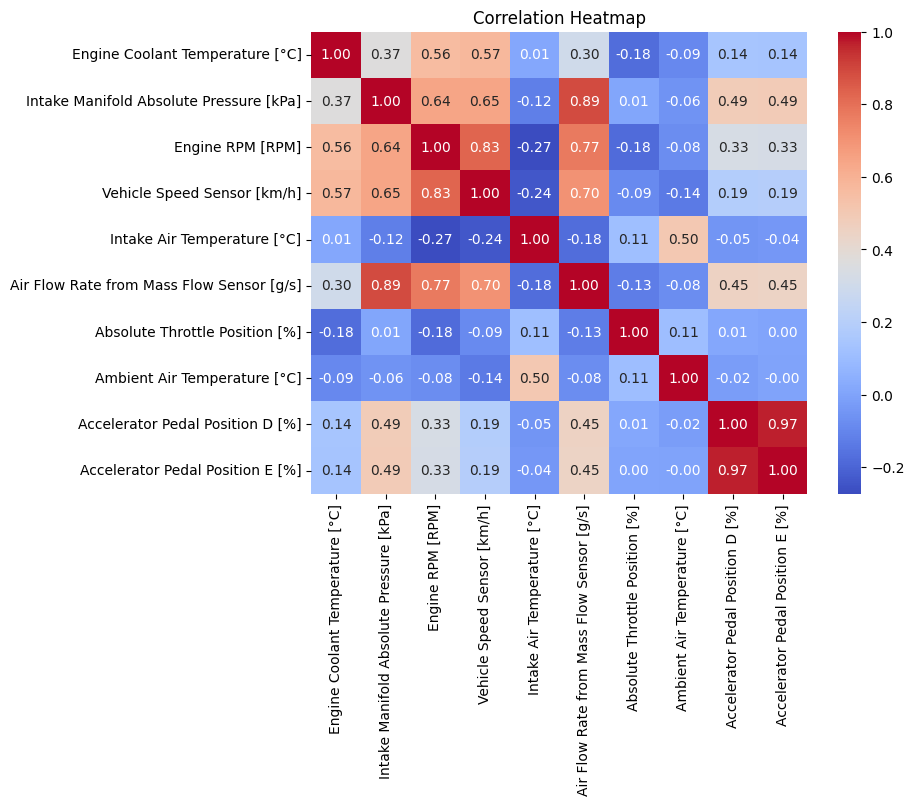

In [30]:
sub_df = df.drop(columns=['date', 'Time', 'model', 'brand', 'source', 'destination', 'condition'])
corr_matrix = sub_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
df.columns

Index(['Time', 'Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]',
       'Air Flow Rate from Mass Flow Sensor [g/s]',
       'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]',
       'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]',
       'date', 'brand', 'model', 'source', 'destination', 'condition'],
      dtype='object')

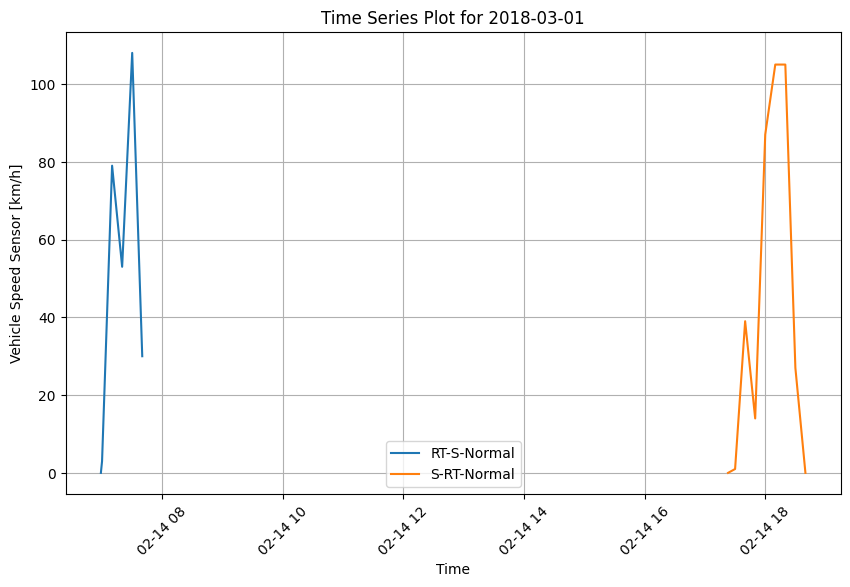

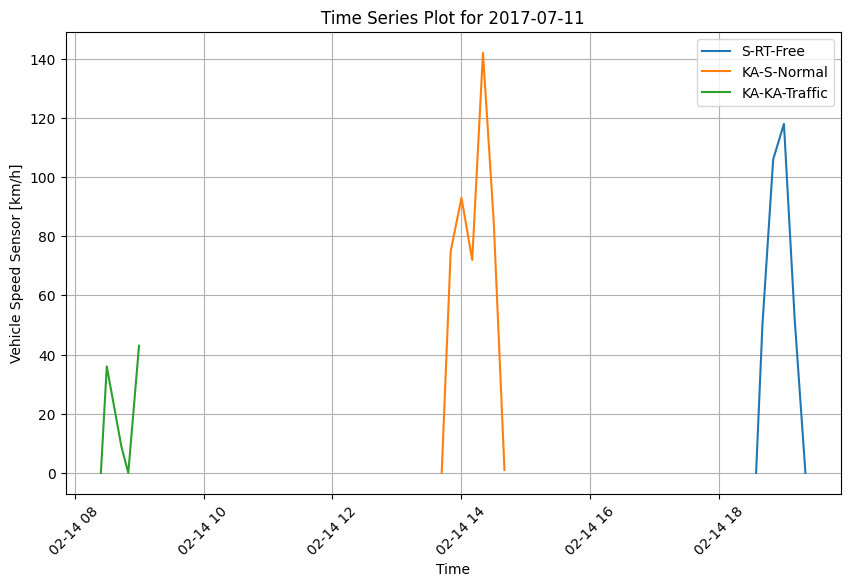

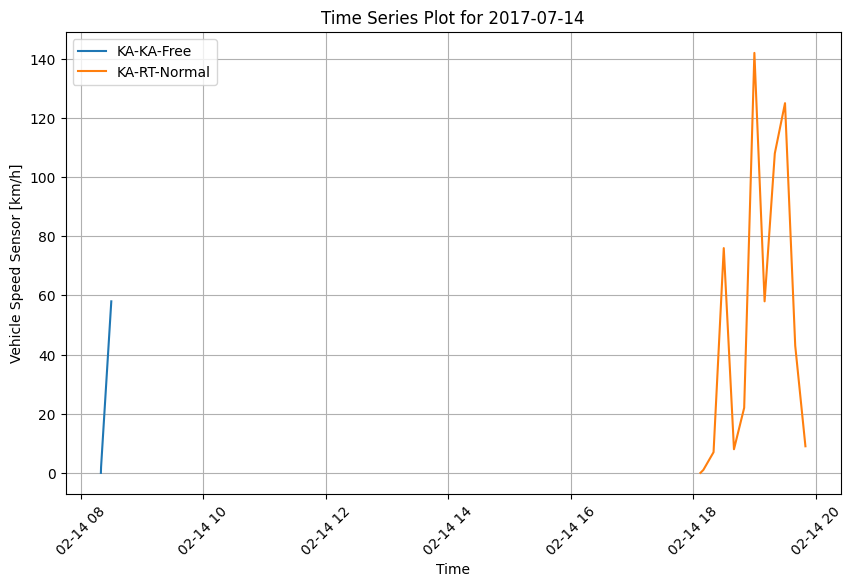

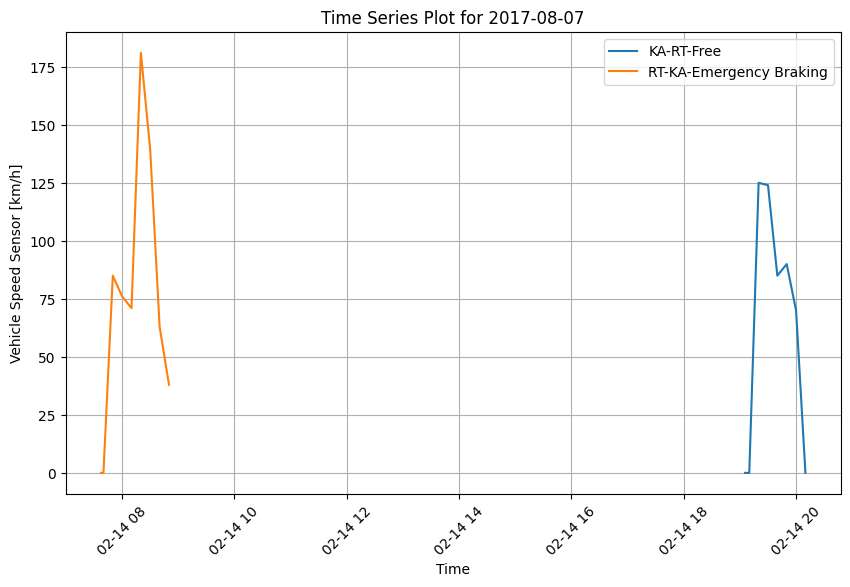

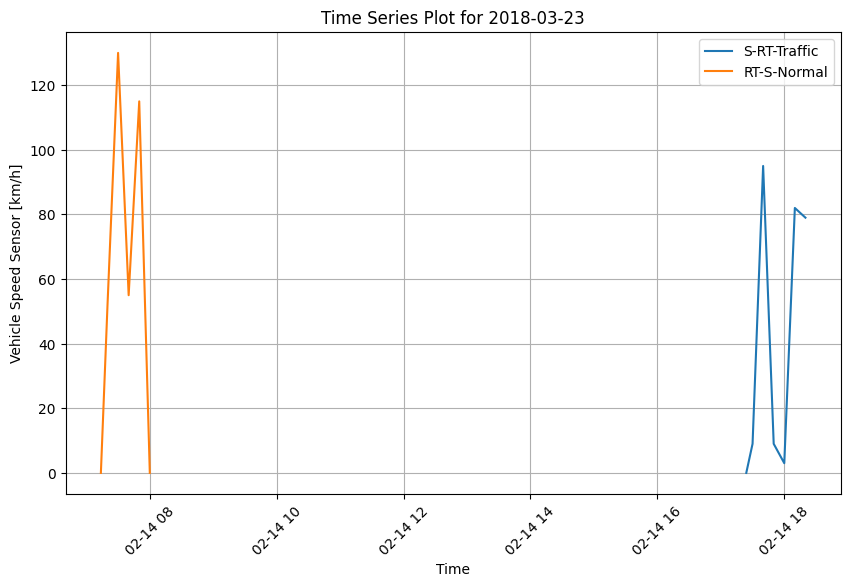

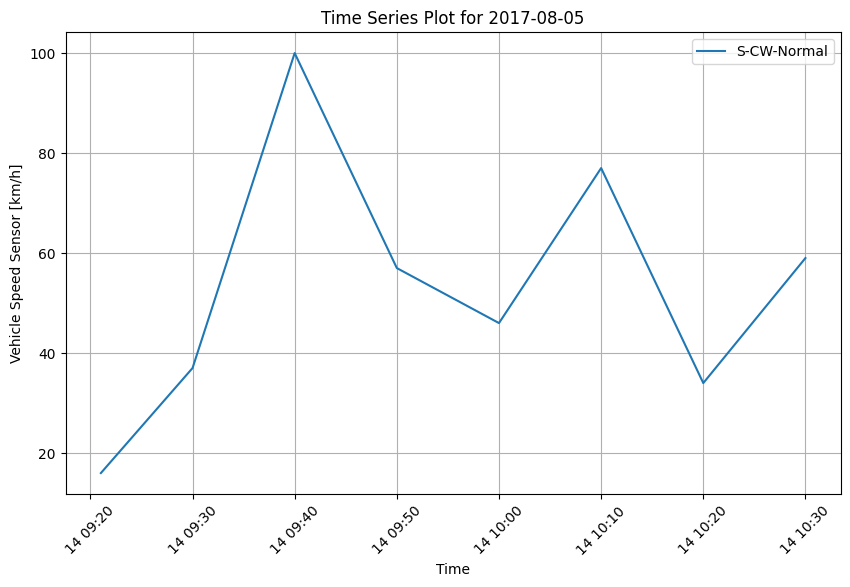

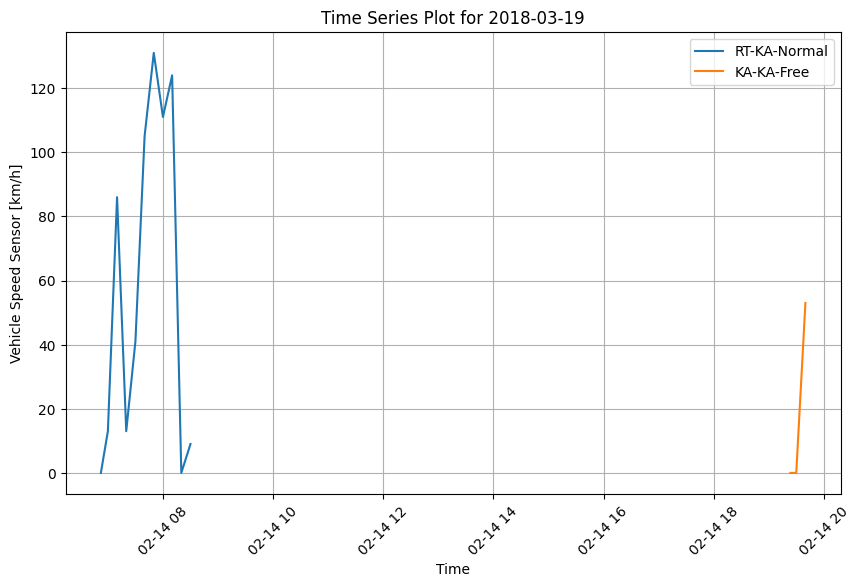

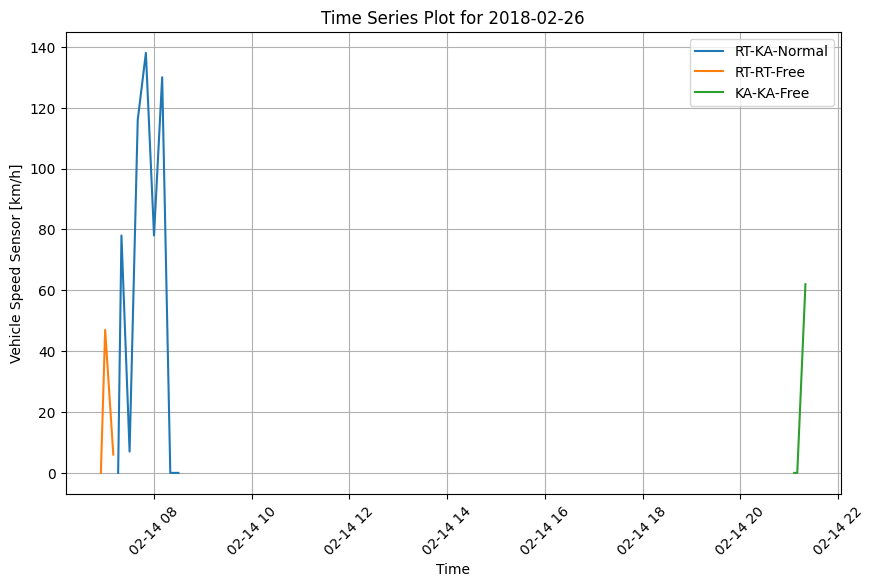

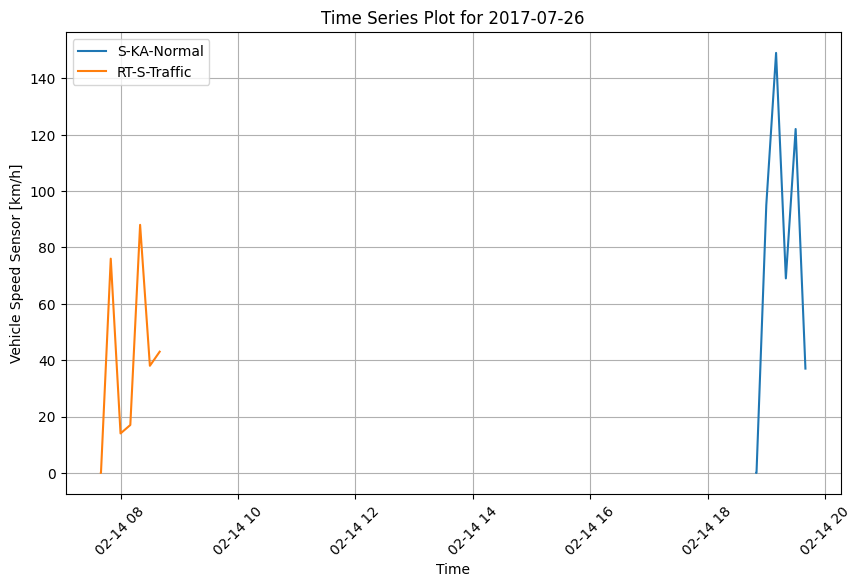

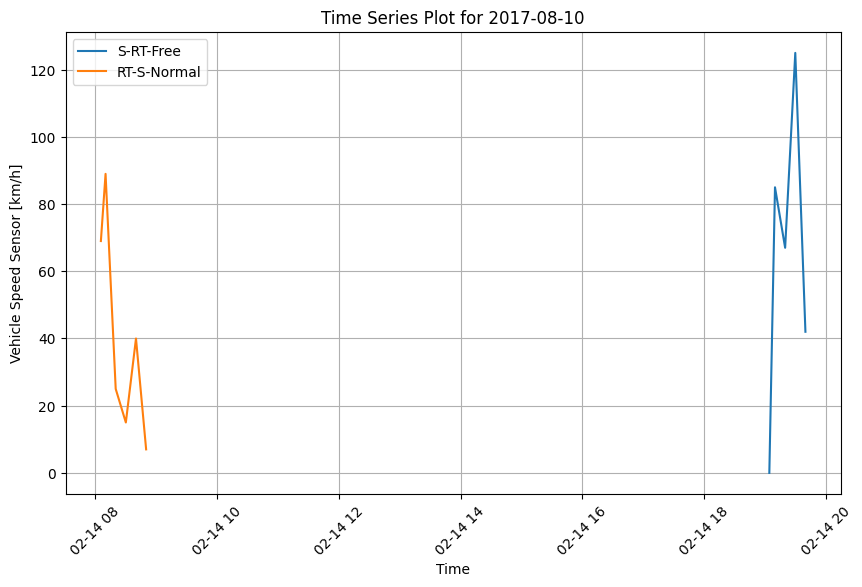

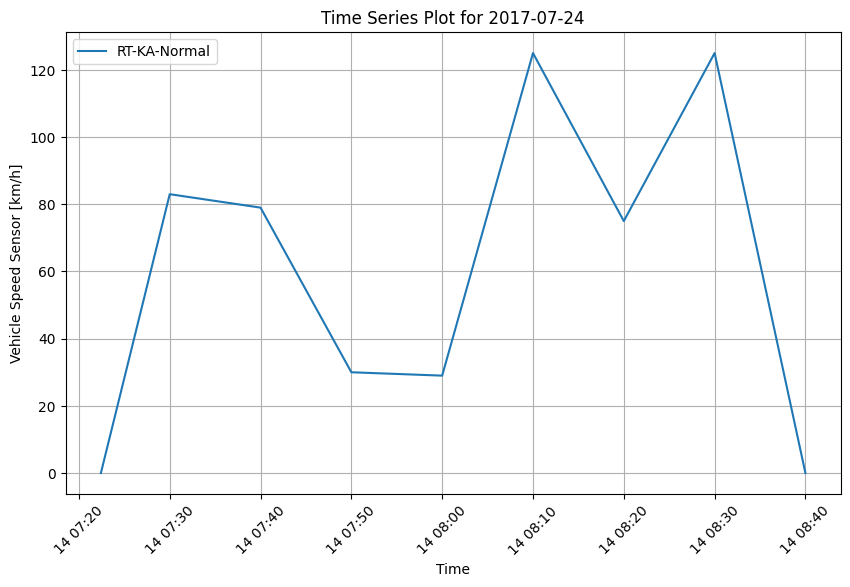

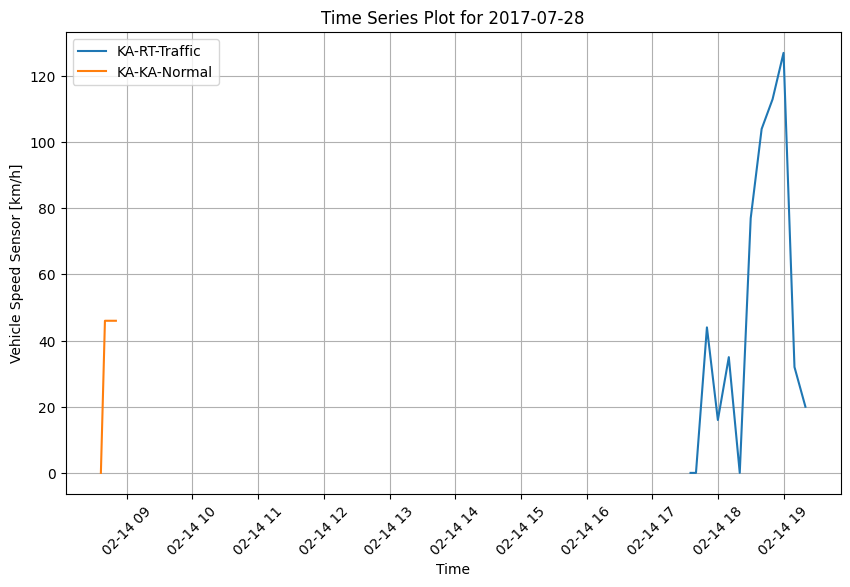

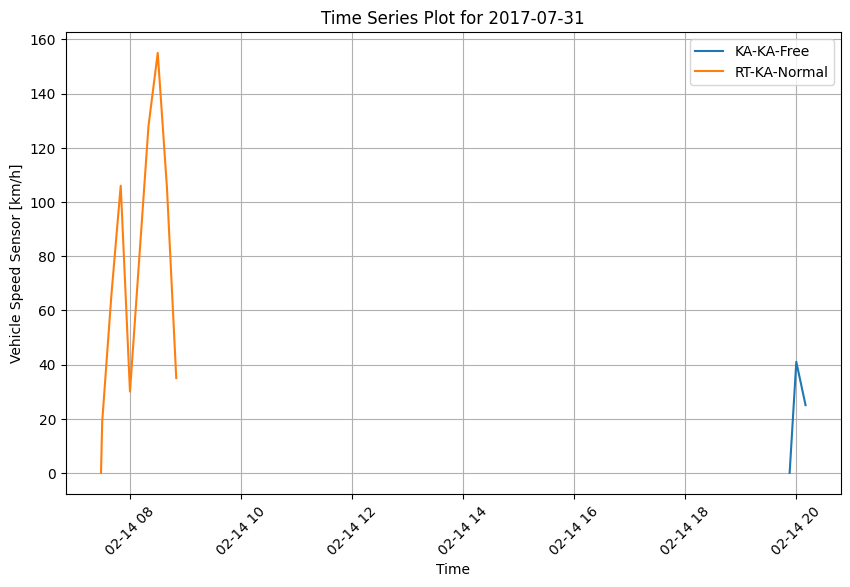

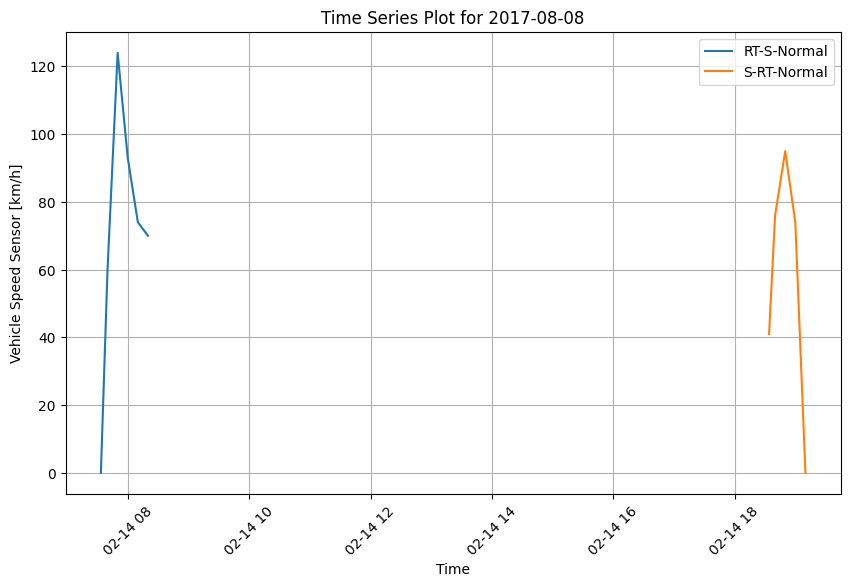

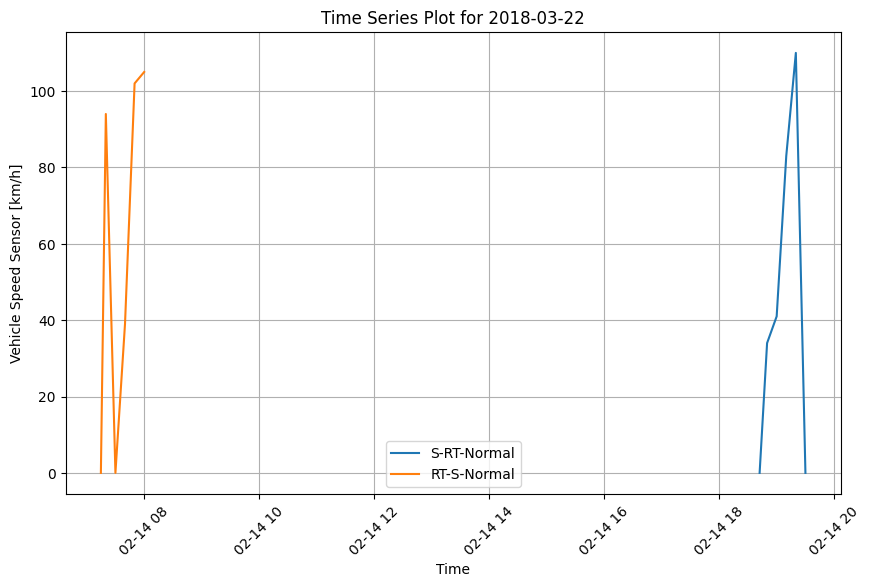

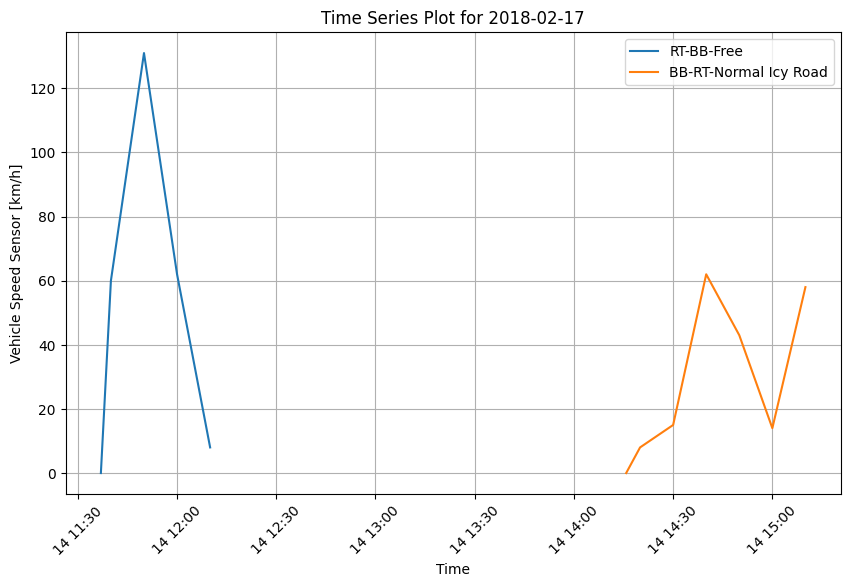

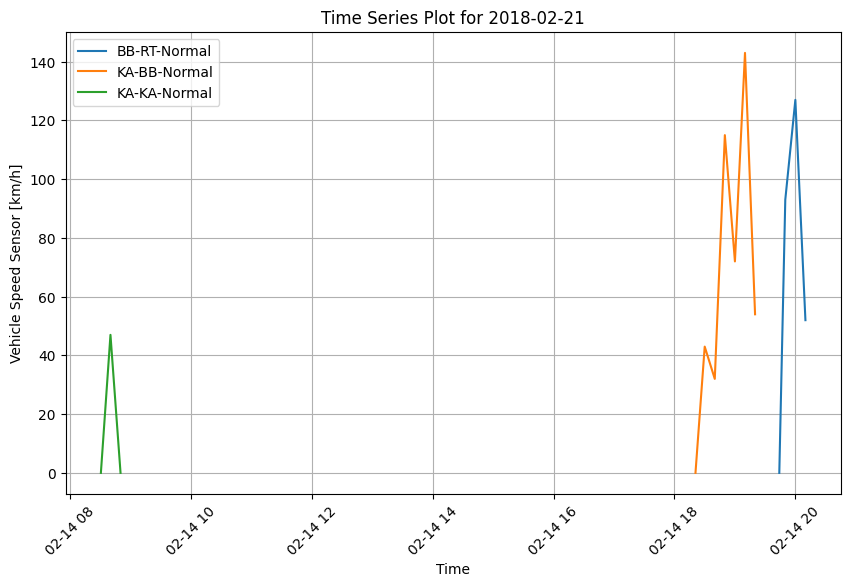

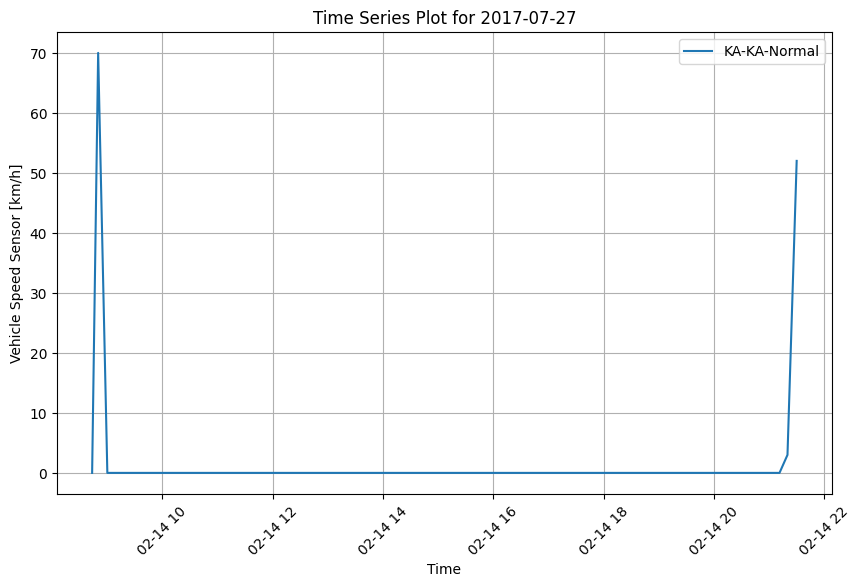

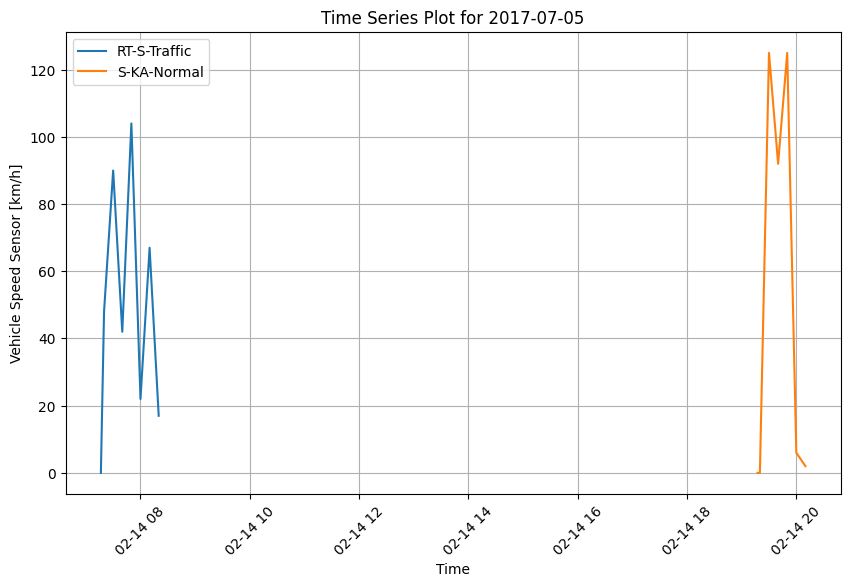

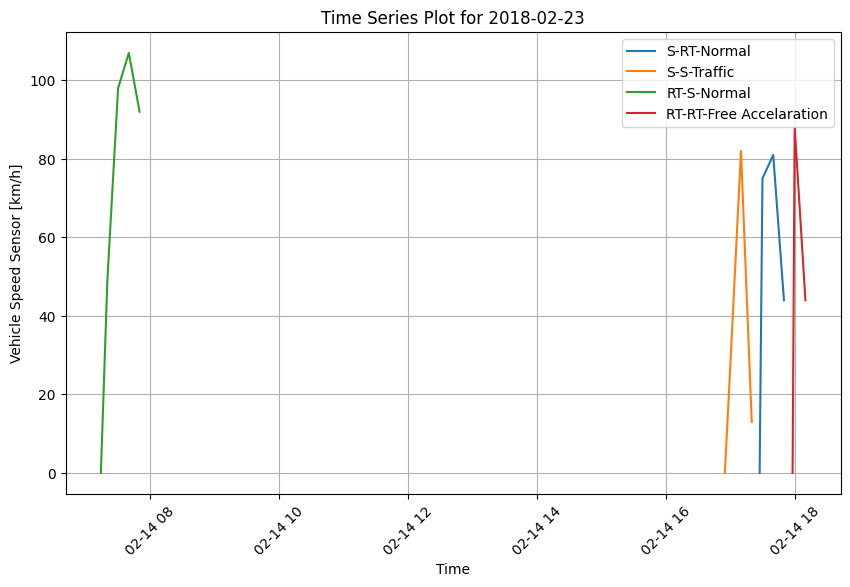

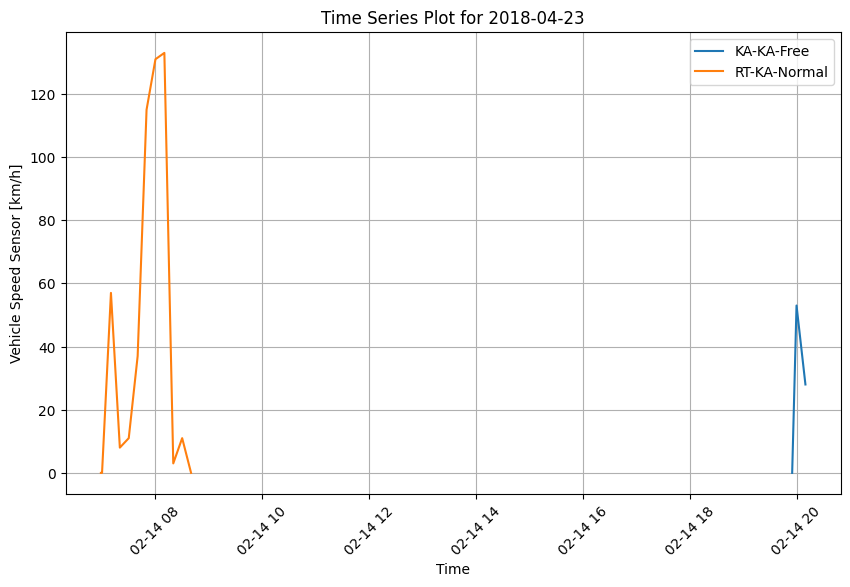

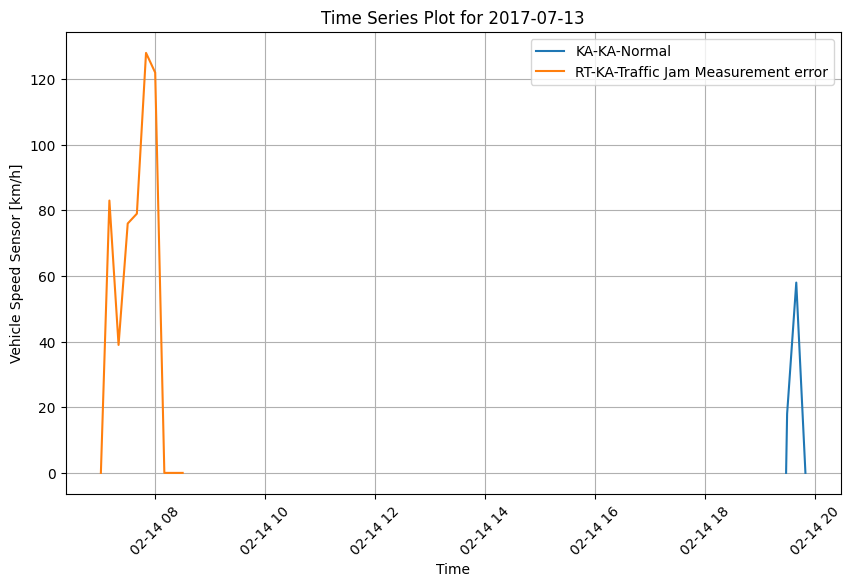

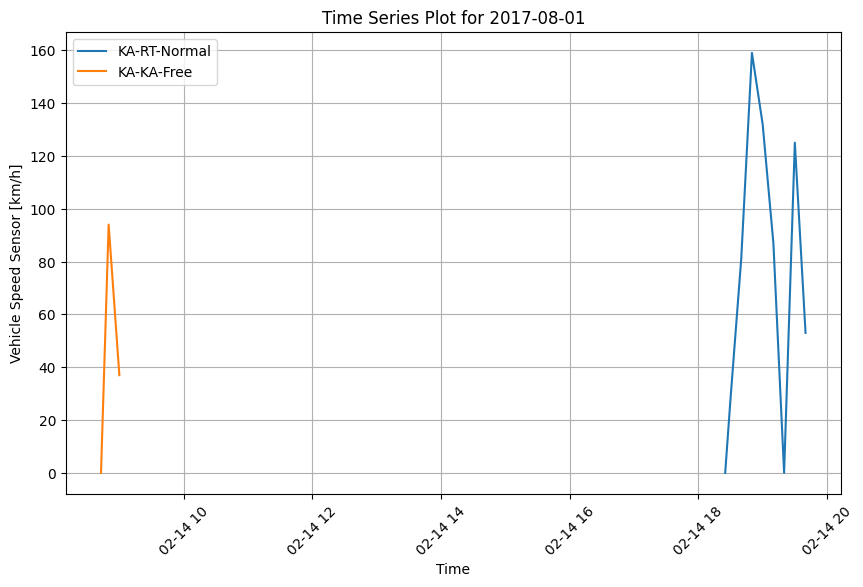

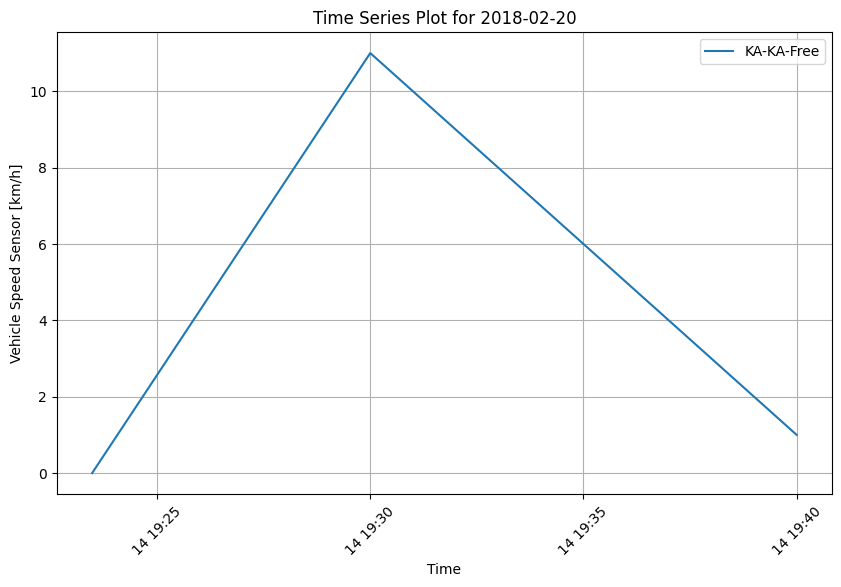

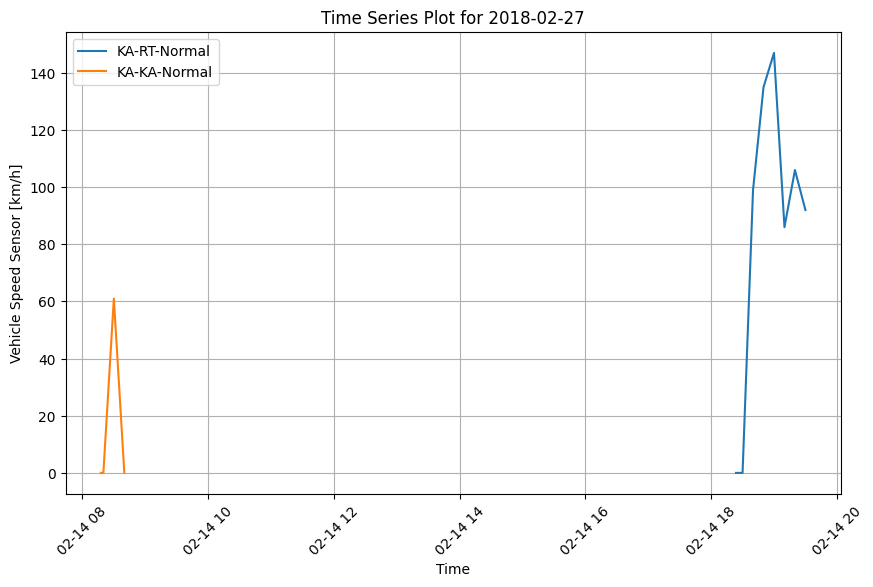

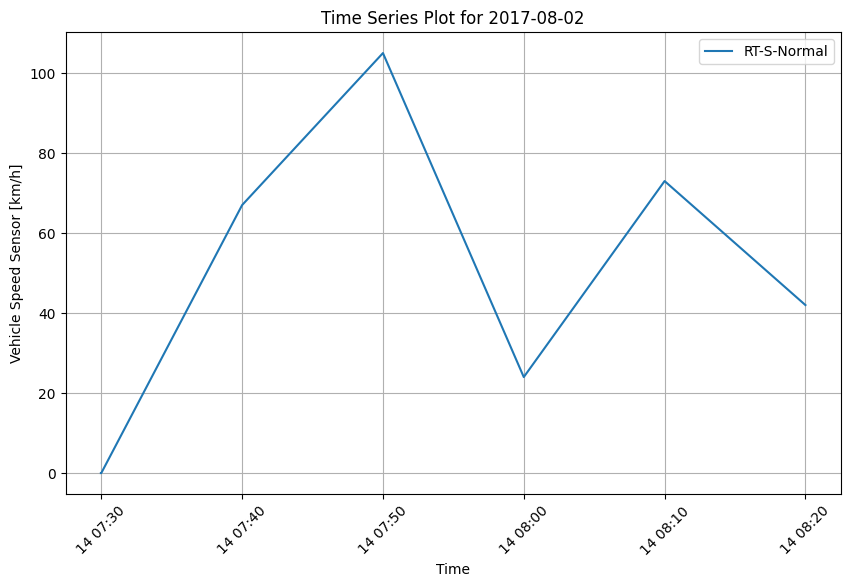

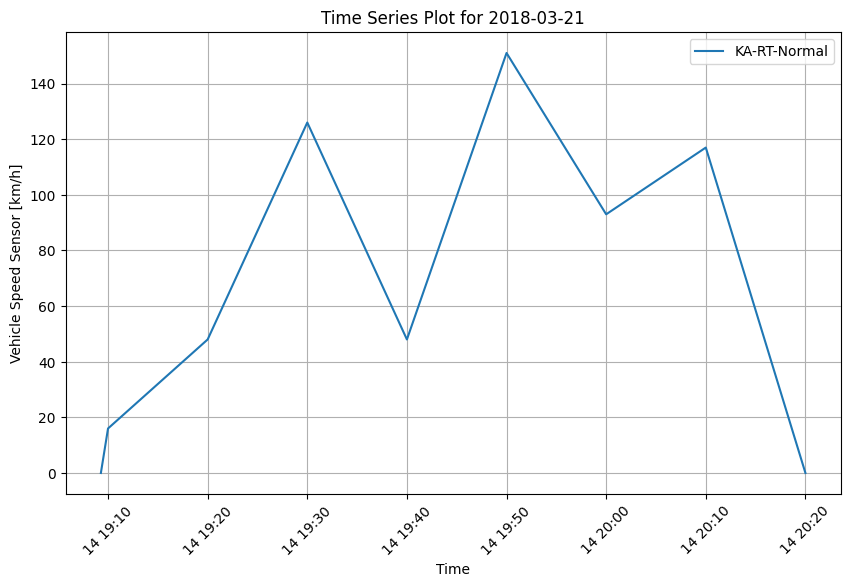

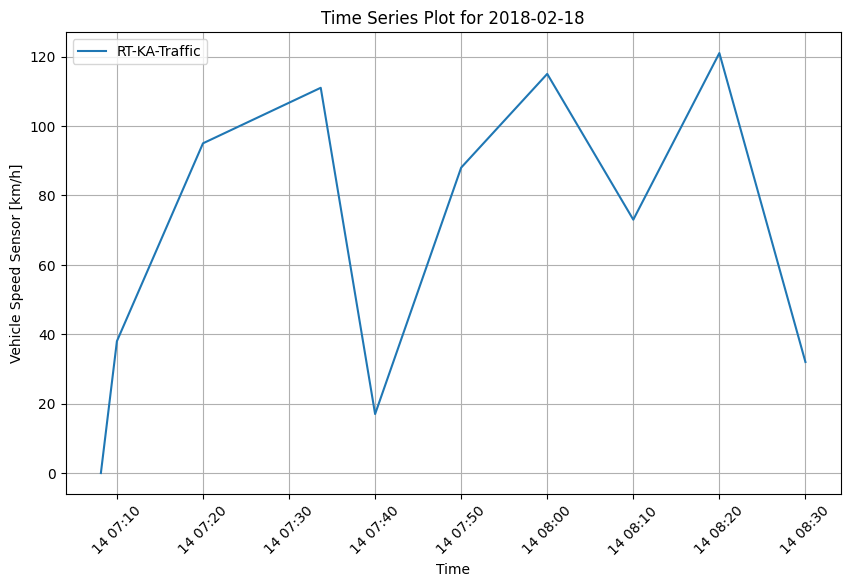

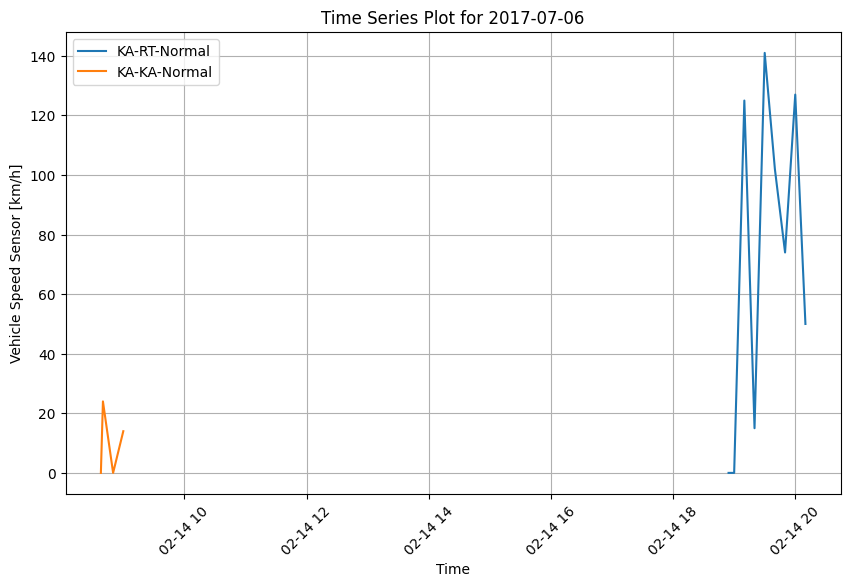

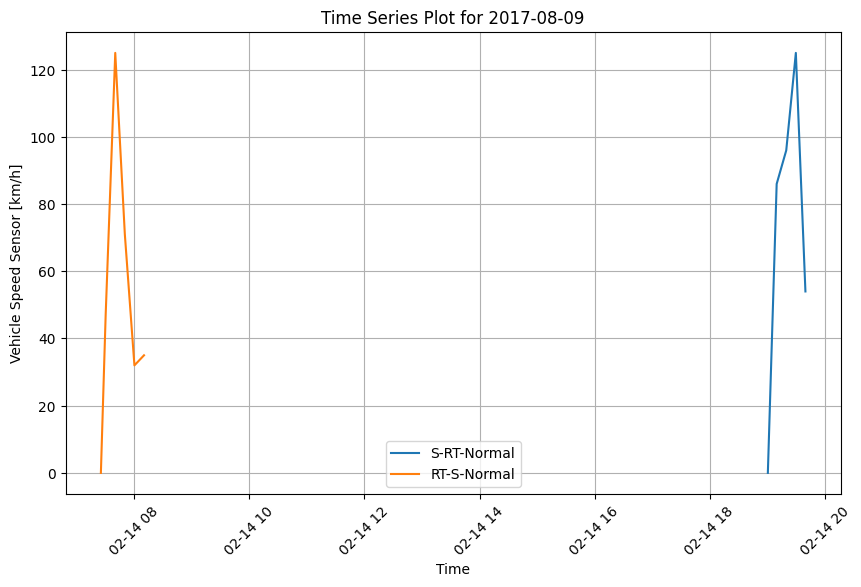

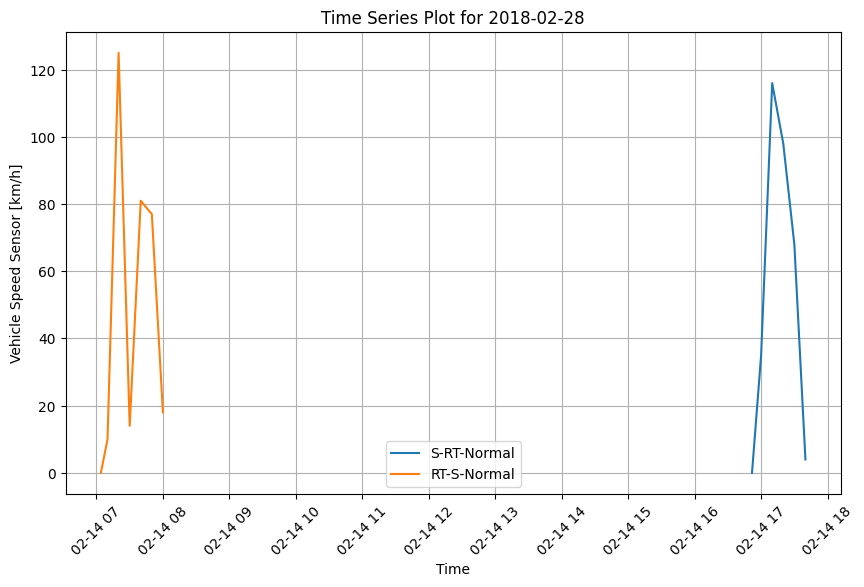

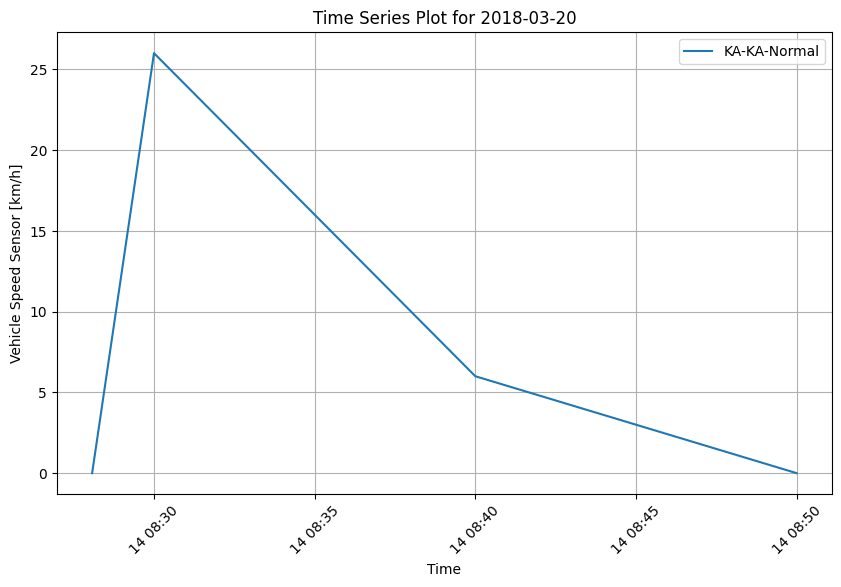

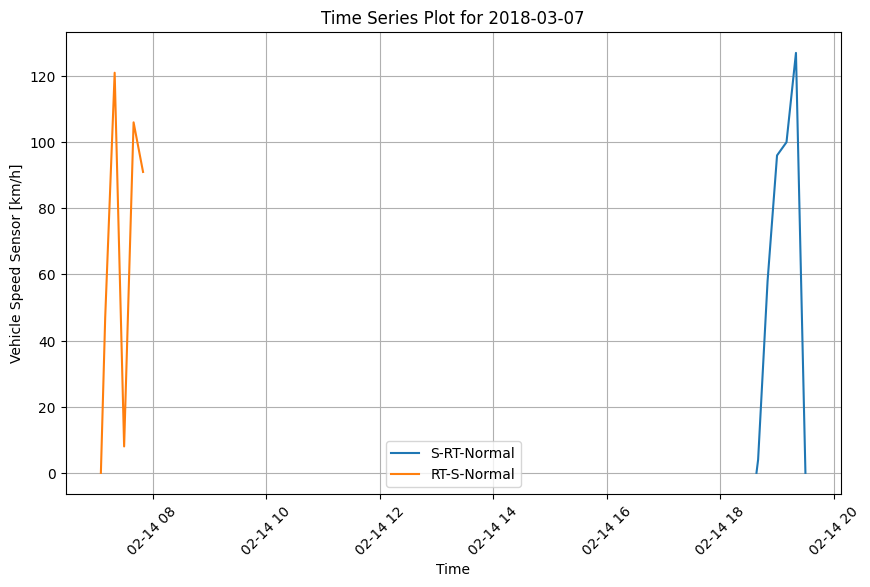

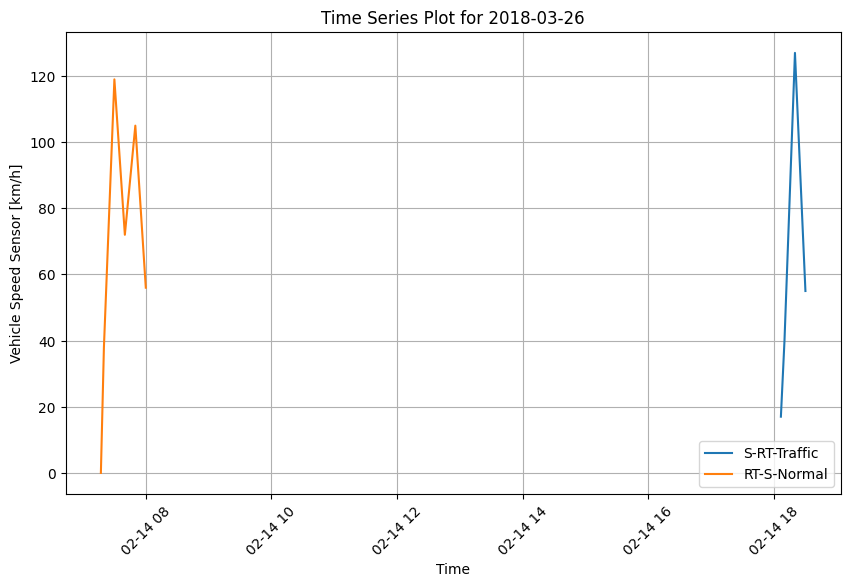

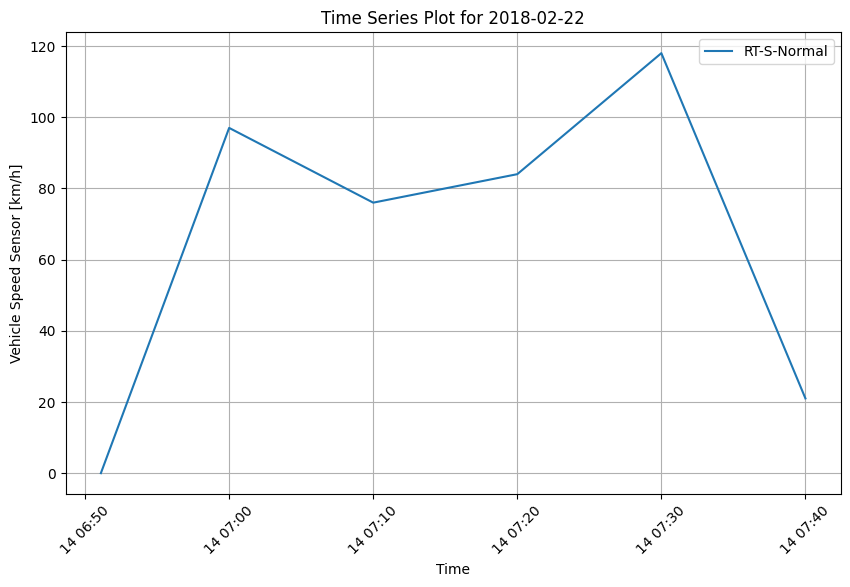

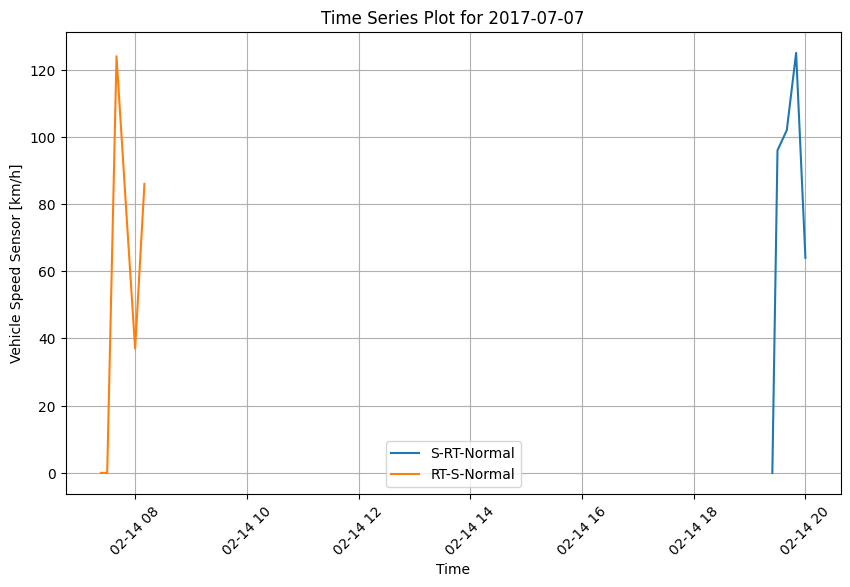

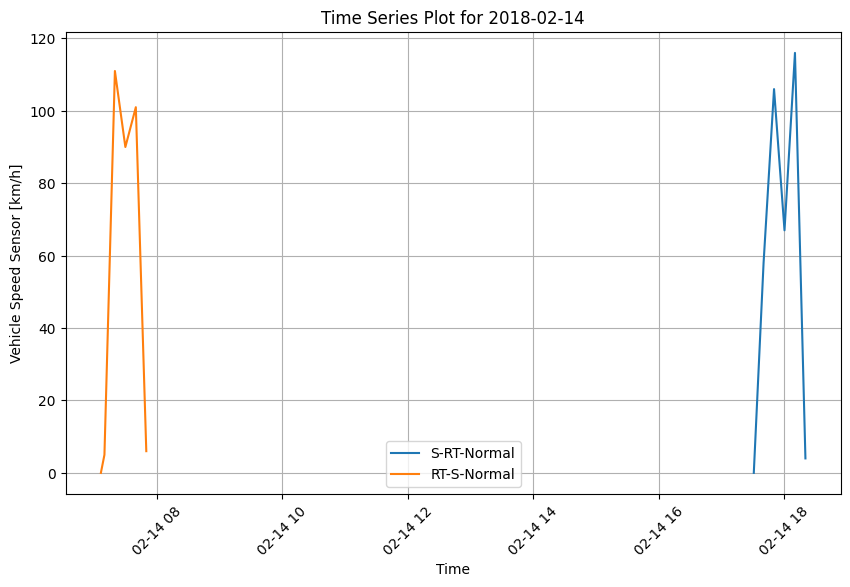

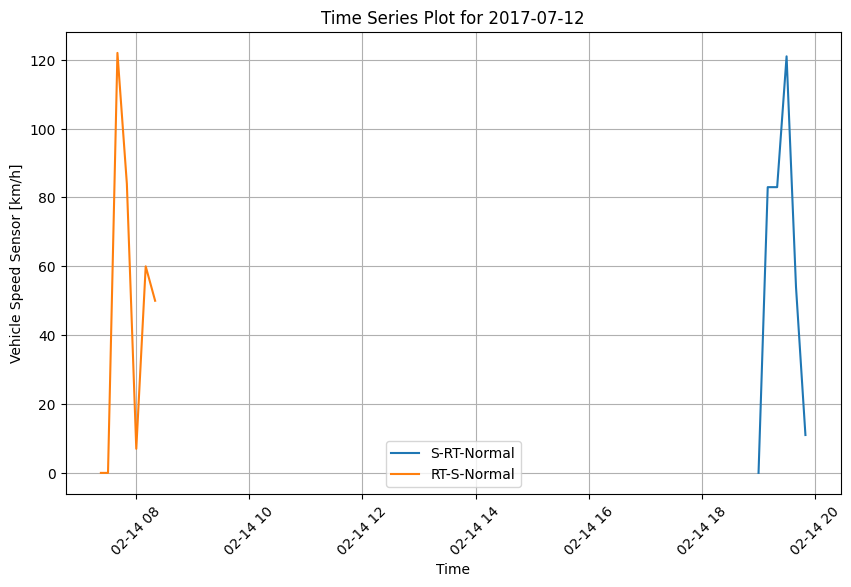

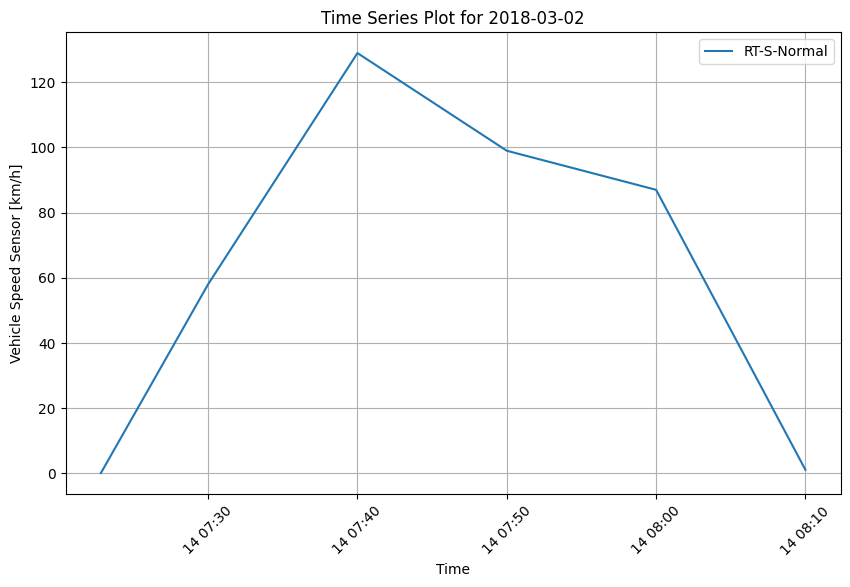

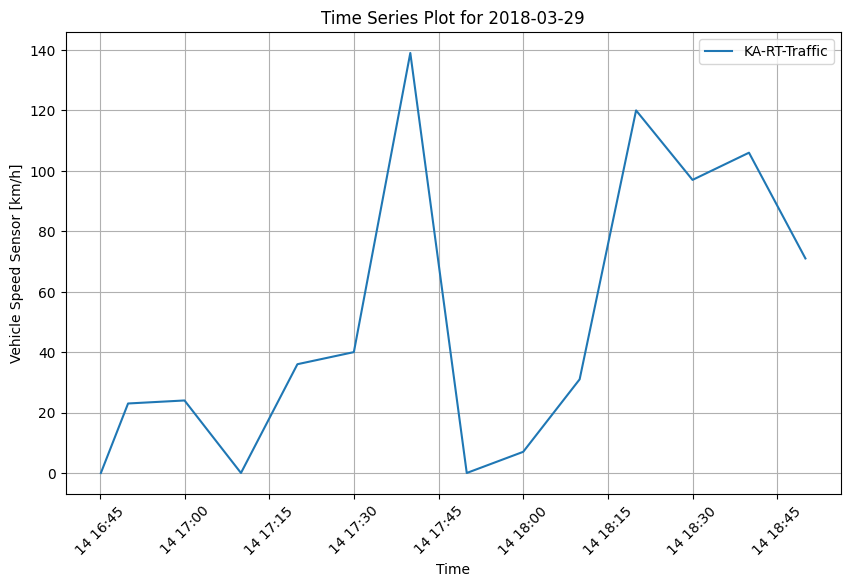

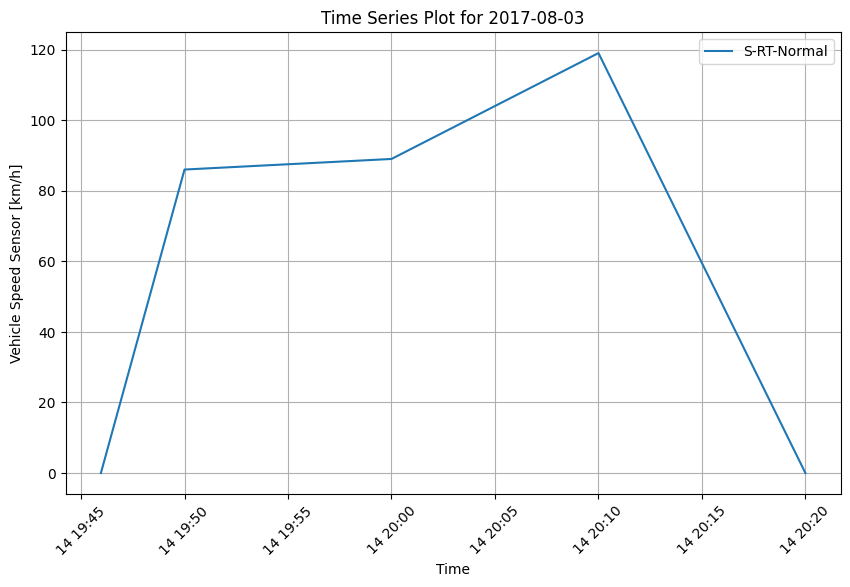

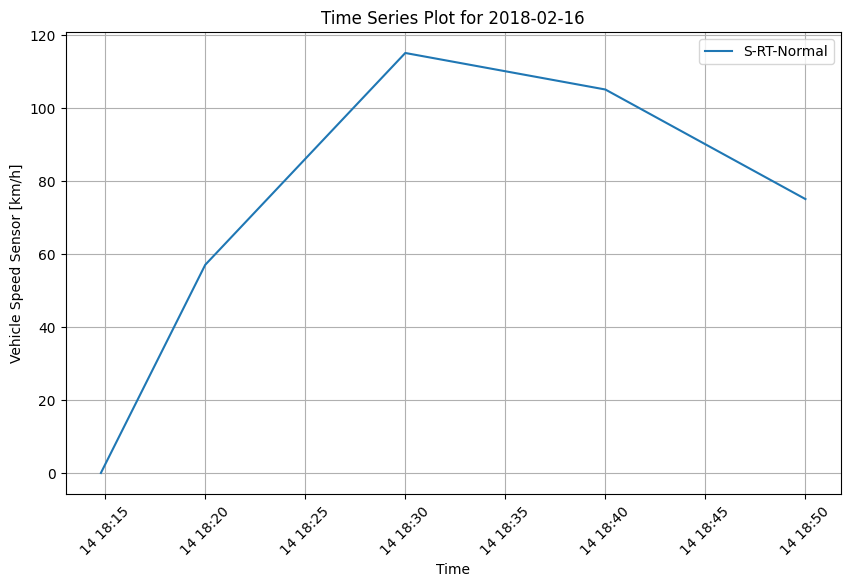

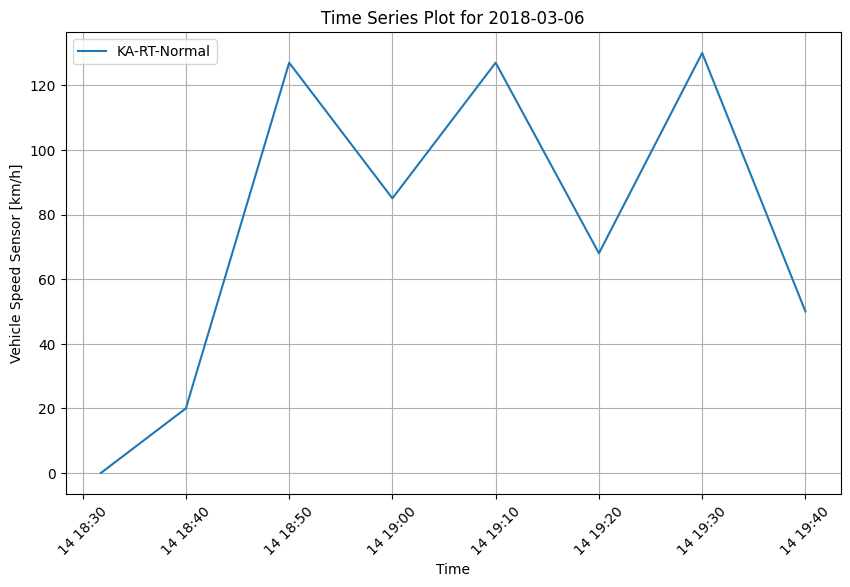

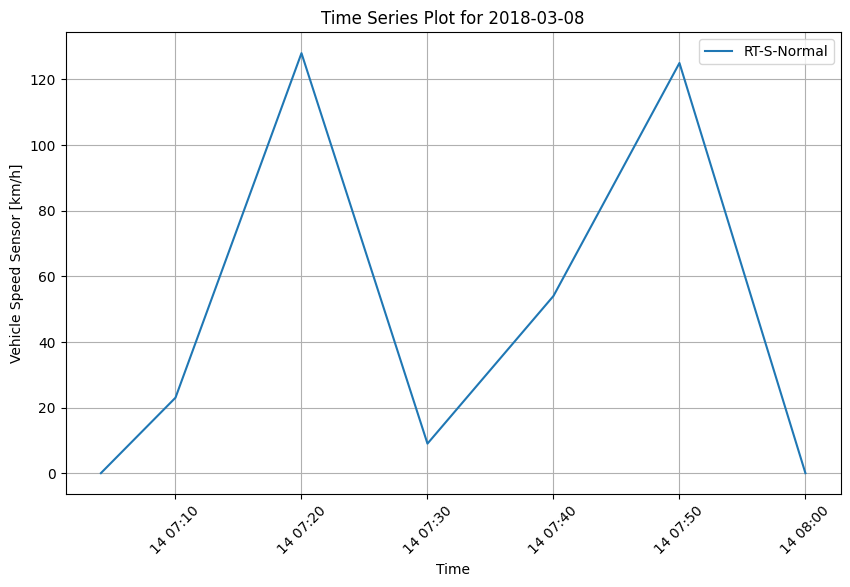

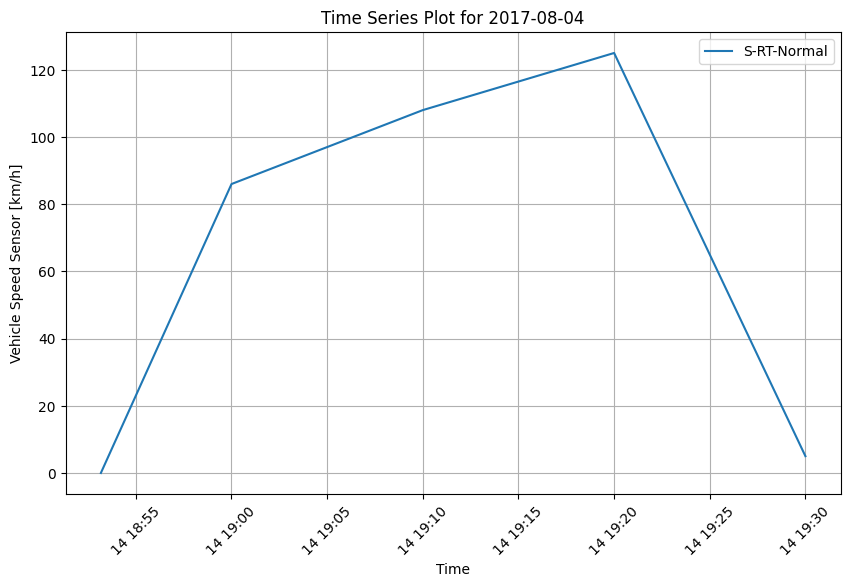

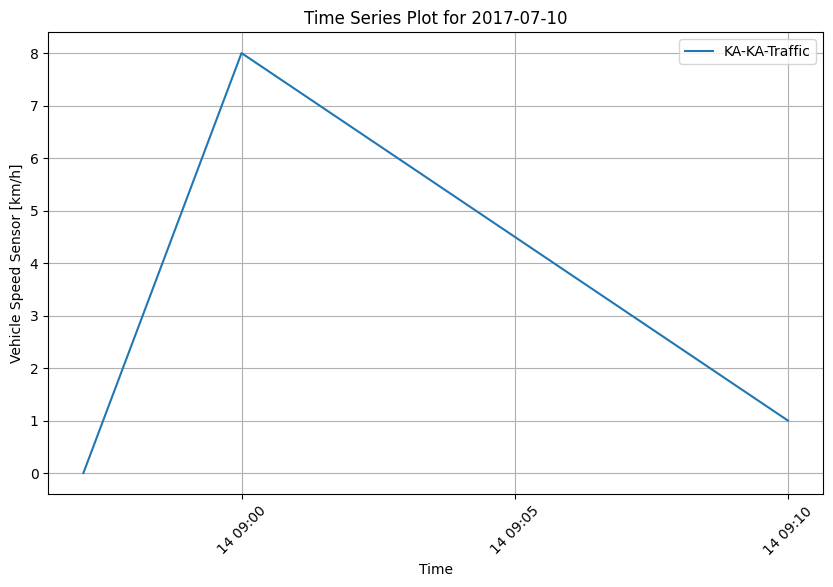

In [32]:
unique_days = df['date'].unique()
for day in unique_days:
    plt.figure(figsize=(10, 6))
    plt.title(f'Time Series Plot for {day}')
    plt.xlabel('Time')
    plt.ylabel('Vehicle Speed Sensor [km/h]')

    sub_df:pd.DataFrame = df[df['date'] == day]
    unique_pairs = sub_df[['source', 'destination', 'condition']].drop_duplicates()
    for index, row in unique_pairs.iterrows():
        sub_sub_df:pd.DataFrame = sub_df[(sub_df["source"] == row["source"]) & (sub_df["destination"] == row["destination"]) & (sub_df["condition"] == row["condition"])]
        plt.plot(sub_sub_df['Time'], sub_sub_df['Vehicle Speed Sensor [km/h]'], label=f"{row['source']}-{row['destination']}-{row['condition']}")
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Add legend
    plt.show()
        
        

#### Factorize Categorical Columns
First we need to factorize categorical columns so that they can be used as fields to train our forcasting model. We would be detecting all the categorical columns and replacing them with numeric values


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2024-02-14 06:50:00 to 2024-02-14 09:10:00
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time                                       505 non-null    datetime64[ns]
 1   Engine Coolant Temperature [Â°C]            258 non-null    float64       
 2   Intake Manifold Absolute Pressure [kPa]    505 non-null    float64       
 3   Engine RPM [RPM]                           505 non-null    float64       
 4   Vehicle Speed Sensor [km/h]                505 non-null    float64       
 5   Intake Air Temperature [Â°C]                258 non-null    float64       
 6   Air Flow Rate from Mass Flow Sensor [g/s]  505 non-null    float64       
 7   Absolute Throttle Position [%]             505 non-null    float64       
 8   Ambient Air Temperature [Â°C]               258 non-null    f

##### First lets convert the date field to pandas datetime format

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2024-02-14 06:50:00 to 2024-02-14 09:10:00
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time                                       505 non-null    datetime64[ns]
 1   Engine Coolant Temperature [Â°C]            258 non-null    float64       
 2   Intake Manifold Absolute Pressure [kPa]    505 non-null    float64       
 3   Engine RPM [RPM]                           505 non-null    float64       
 4   Vehicle Speed Sensor [km/h]                505 non-null    float64       
 5   Intake Air Temperature [Â°C]                258 non-null    float64       
 6   Air Flow Rate from Mass Flow Sensor [g/s]  505 non-null    float64       
 7   Absolute Throttle Position [%]             505 non-null    float64       
 8   Ambient Air Temperature [Â°C]               258 non-null    f

In [39]:
# get all the unique values of brand, model, source, destination and condition
brands = list(df["brand"].unique())
models  = list(df["model"].unique())
locations = list(set(list(df['source'].unique()) + list(df['destination'])))
conditions = list(df["condition"].unique())

In [40]:
brands, models, locations, conditions

(['Seat'],
 ['Leon'],
 ['RT', 'S', 'BB', 'CW', 'KA'],
 ['Normal',
  'Free',
  'Traffic',
  'Emergency Braking',
  'Normal Icy Road',
  'Free Accelaration',
  'Traffic Jam Measurement error'])

In [41]:
analytics_df = df.copy()


In [42]:
# transform brand
def transform_brand(brand):
    return brands.index(brand)

analytics_df['brand'] = df['brand'].apply(transform_brand)


In [43]:
def transform_model(model):
    return models.index(model)

analytics_df["model"] = df["model"].apply(transform_model)

In [44]:
def transform_location(location):
    return locations.index(location)

analytics_df["source"] = df["source"].apply(transform_location)
analytics_df["destination"] = df["destination"].apply(transform_location)

In [45]:
def transform_condition(condition):
    return conditions.index(condition)

analytics_df["condition"] = df["condition"].apply(transform_condition)

In [46]:
df.head()

Time  Engine Coolant Temperature [Â°C]  \
RoundedTime                                                                    
2024-02-14 06:50:00 2024-02-14 06:58:50.068                              8.0   
2024-02-14 07:00:00 2024-02-14 07:00:00.085                             11.0   
2024-02-14 07:10:00 2024-02-14 07:10:00.004                             66.0   
2024-02-14 07:20:00 2024-02-14 07:20:00.029                             89.0   
2024-02-14 07:30:00 2024-02-14 07:30:00.086                             90.0   

                     Intake Manifold Absolute Pressure [kPa]  \
RoundedTime                                                    
2024-02-14 06:50:00                                     95.0   
2024-02-14 07:00:00                                    101.0   
2024-02-14 07:10:00                                    130.0   
2024-02-14 07:20:00                                    104.0   
2024-02-14 07:30:00                                    108.0   

                     Engine RPM [RPM]  Vehicle Speed Sensor [km/h]  \
RoundedTime                                                          
2024-02-14 06:50:00               0.0                          0.0   
2024-02-14 07:00:00            1045.0                          3.0   
2024-02-14 07:10:00            1607.0                         79.0   
2024-02-14 07:20:00            1360.0                         53.0   
2024-02-14 07:30:00            1818.0                        108.0   

                     Intake Air Temperature [Â°C]  \
RoundedTime                                        
2024-02-14 06:50:00                          0.0   
2024-02-14 07:00:00                          5.0   
2024-02-14 07:10:00                         -4.0   
2024-02-14 07:20:00                         -5.0   
2024-02-14 07:30:00                         -3.0   

                     Air Flow Rate from Mass Flow Sensor [g/s]  \
RoundedTime                                                      
2024-02-14 06:50:00                                       0.86   
2024-02-14 07:00:00                                      18.72   
2024-02-14 07:10:00                                      22.11   
2024-02-14 07:20:00                                      11.61   
2024-02-14 07:30:00                                      16.38   

                     Absolute Throttle Position [%]  \
RoundedTime                                           
2024-02-14 06:50:00                            89.0   
2024-02-14 07:00:00                            83.5   
2024-02-14 07:10:00                            83.5   
2024-02-14 07:20:00                            83.5   
2024-02-14 07:30:00                            83.5   

                     Ambient Air Temperature [Â°C]  \
RoundedTime                                         
2024-02-14 06:50:00                           0.0   
2024-02-14 07:00:00                          -2.0   
2024-02-14 07:10:00                          -8.0   
2024-02-14 07:20:00                          -8.0   
2024-02-14 07:30:00                          -9.0   

                     Accelerator Pedal Position D [%]  \
RoundedTime                                             
2024-02-14 06:50:00                              14.1   
2024-02-14 07:00:00                              14.1   
2024-02-14 07:10:00                              38.8   
2024-02-14 07:20:00                              20.4   
2024-02-14 07:30:00                              14.1   

                     Accelerator Pedal Position E [%]       date brand model  \
RoundedTime                                                                    
2024-02-14 06:50:00                              14.5 2018-03-01  Seat  Leon   
2024-02-14 07:00:00                              14.5 2018-03-01  Seat  Leon   
2024-02-14 07:10:00                              39.2 2018-03-01  Seat  Leon   
2024-02-14 07:20:00                              16.5 2018-03-01  Seat  Leon   
2024-02-14 07:30:00                              14.5 2018-03-01  Sea

In [47]:
analytics_df.head()

Time  Engine Coolant Temperature [Â°C]  \
RoundedTime                                                                    
2024-02-14 06:50:00 2024-02-14 06:58:50.068                              8.0   
2024-02-14 07:00:00 2024-02-14 07:00:00.085                             11.0   
2024-02-14 07:10:00 2024-02-14 07:10:00.004                             66.0   
2024-02-14 07:20:00 2024-02-14 07:20:00.029                             89.0   
2024-02-14 07:30:00 2024-02-14 07:30:00.086                             90.0   

                     Intake Manifold Absolute Pressure [kPa]  \
RoundedTime                                                    
2024-02-14 06:50:00                                     95.0   
2024-02-14 07:00:00                                    101.0   
2024-02-14 07:10:00                                    130.0   
2024-02-14 07:20:00                                    104.0   
2024-02-14 07:30:00                                    108.0   

                     Engine RPM [RPM]  Vehicle Speed Sensor [km/h]  \
RoundedTime                                                          
2024-02-14 06:50:00               0.0                          0.0   
2024-02-14 07:00:00            1045.0                          3.0   
2024-02-14 07:10:00            1607.0                         79.0   
2024-02-14 07:20:00            1360.0                         53.0   
2024-02-14 07:30:00            1818.0                        108.0   

                     Intake Air Temperature [Â°C]  \
RoundedTime                                        
2024-02-14 06:50:00                          0.0   
2024-02-14 07:00:00                          5.0   
2024-02-14 07:10:00                         -4.0   
2024-02-14 07:20:00                         -5.0   
2024-02-14 07:30:00                         -3.0   

                     Air Flow Rate from Mass Flow Sensor [g/s]  \
RoundedTime                                                      
2024-02-14 06:50:00                                       0.86   
2024-02-14 07:00:00                                      18.72   
2024-02-14 07:10:00                                      22.11   
2024-02-14 07:20:00                                      11.61   
2024-02-14 07:30:00                                      16.38   

                     Absolute Throttle Position [%]  \
RoundedTime                                           
2024-02-14 06:50:00                            89.0   
2024-02-14 07:00:00                            83.5   
2024-02-14 07:10:00                            83.5   
2024-02-14 07:20:00                            83.5   
2024-02-14 07:30:00                            83.5   

                     Ambient Air Temperature [Â°C]  \
RoundedTime                                         
2024-02-14 06:50:00                           0.0   
2024-02-14 07:00:00                          -2.0   
2024-02-14 07:10:00                          -8.0   
2024-02-14 07:20:00                          -8.0   
2024-02-14 07:30:00                          -9.0   

                     Accelerator Pedal Position D [%]  \
RoundedTime                                             
2024-02-14 06:50:00                              14.1   
2024-02-14 07:00:00                              14.1   
2024-02-14 07:10:00                              38.8   
2024-02-14 07:20:00                              20.4   
2024-02-14 07:30:00                              14.1   

                     Accelerator Pedal Position E [%]       date  brand  \
RoundedTime                                                               
2024-02-14 06:50:00                              14.5 2018-03-01      0   
2024-02-14 07:00:00                              14.5 2018-03-01      0   
2024-02-14 07:10:00                              39.2 2018-03-01      0   
2024-02-14 07:20:00                              16.5 2018-03-01      0   
2024-02-14 07:30:00                              14.5 2018-03-01      0   

                     mo

#### Using Arima Model
ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model in machine learning. It's particularly effective for analyzing and forecasting time series data that exhibits non-stationary behavior, meaning the statistical properties such as mean and variance change over time. 

We would be using ARIMA as our first forcasting model in this process

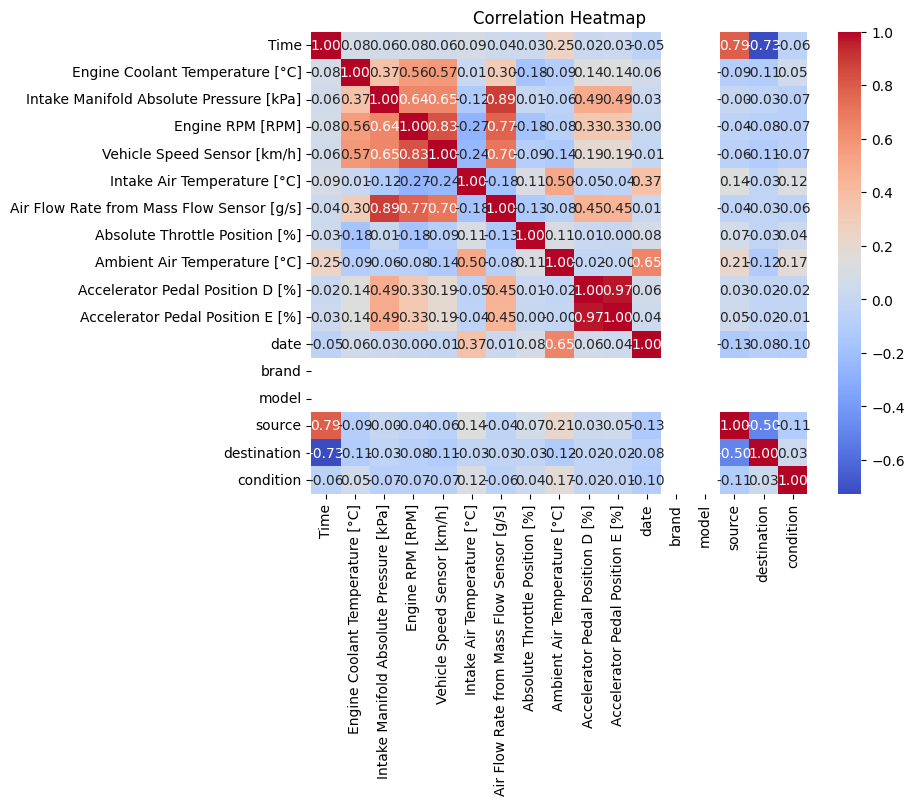

In [44]:
corr_matrix = analytics_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [45]:
analytics_df.columns

Index(['Time', 'Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]',
       'Air Flow Rate from Mass Flow Sensor [g/s]',
       'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]',
       'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]',
       'date', 'brand', 'model', 'source', 'destination', 'condition'],
      dtype='object')

In [46]:
# we would remove all the columns that do not have high correlation with our target whic is vehicle speed sensor
columns_to_keep = ['Time', 'Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Vehicle Speed Sensor [km/h]', 'Engine RPM [RPM]', 'source', 'destination', 'condition']

In [47]:
# Identify columns to drop
columns_to_drop = set(analytics_df.columns) - set(columns_to_keep)

# Drop columns not in the specified set
analytics_df:pd.DataFrame = analytics_df.drop(columns=columns_to_drop)

In [48]:
analytics_df.columns

Index(['Time', 'Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'source', 'destination', 'condition'],
      dtype='object')

In [49]:
import statsmodels.api as sm

In [50]:
analytics_df.head()

Time  Engine Coolant Temperature [Â°C]  \
RoundedTime                                                                    
2024-02-14 06:50:00 2024-02-14 06:58:50.068                              8.0   
2024-02-14 07:00:00 2024-02-14 07:00:00.085                             11.0   
2024-02-14 07:10:00 2024-02-14 07:10:00.004                             66.0   
2024-02-14 07:20:00 2024-02-14 07:20:00.029                             89.0   
2024-02-14 07:30:00 2024-02-14 07:30:00.086                             90.0   

                     Intake Manifold Absolute Pressure [kPa]  \
RoundedTime                                                    
2024-02-14 06:50:00                                     95.0   
2024-02-14 07:00:00                                    101.0   
2024-02-14 07:10:00                                    130.0   
2024-02-14 07:20:00                                    104.0   
2024-02-14 07:30:00                                    108.0   

                     Engine RPM [RPM]  Vehicle Speed Sensor [km/h]  source  \
RoundedTime                                                                  
2024-02-14 06:50:00               0.0                          0.0       0   
2024-02-14 07:00:00            1045.0                          3.0       0   
2024-02-14 07:10:00            1607.0                         79.0       0   
2024-02-14 07:20:00            1360.0                         53.0       0   
2024-02-14 07:30:00            1818.0                        108.0       0   

                     destination  condition  
RoundedTime                                  
2024-02-14 06:50:00            3          0  
2024-02-14 07:00:00            3          0  
2024-02-14 07:10:00            3          0  
2024-02-14 07:20:00            3          0  
2024-02-14 07:30:00            3          0

In [51]:
analytics_df.shape[0]

505

In [52]:
analytics_df = analytics_df.dropna(how='any')

In [53]:
analytics_df.shape[0]

258

In [54]:
train_size = int(analytics_df.shape[0] * 0.8)
train_size

206

In [55]:
train_data = analytics_df[:train_size]
test_data = analytics_df[train_size:]

In [56]:
model = sm.tsa.ARIMA(train_data['Vehicle Speed Sensor [km/h]'], order=(1, 1, 1), exog=train_data[['Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]', 'source',
       'destination', 'condition']])
fit_model = model.fit()

/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-pa

In [57]:
import pickle

In [58]:
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(fit_model, f)

In [59]:
with open('arima_model.pkl', 'rb') as f:
    fit_model = pickle.load(f)

In [60]:
# Forecast
forecast = fit_model.forecast(steps=len(test_data), exog=test_data[['Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]', 'source',
       'destination', 'condition']])

/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
type(forecast)

pandas.core.series.Series

In [63]:
test_data.tail()

Time  Engine Coolant Temperature [Â°C]  \
RoundedTime                                                                    
2024-02-14 07:20:00 2024-02-14 07:20:00.027                             90.0   
2024-02-14 07:30:00 2024-02-14 07:30:00.055                             88.0   
2024-02-14 07:40:00 2024-02-14 07:40:00.087                             90.0   
2024-02-14 07:50:00 2024-02-14 07:50:00.089                             90.0   
2024-02-14 08:00:00 2024-02-14 08:00:00.007                             89.0   

                     Intake Manifold Absolute Pressure [kPa]  \
RoundedTime                                                    
2024-02-14 07:20:00                                    137.0   
2024-02-14 07:30:00                                    100.0   
2024-02-14 07:40:00                                    108.0   
2024-02-14 07:50:00                                    158.0   
2024-02-14 08:00:00                                     96.0   

                     Engine RPM [RPM]  Vehicle Speed Sensor [km/h]  source  \
RoundedTime                                                                  
2024-02-14 07:20:00            2154.0                        128.0       0   
2024-02-14 07:30:00             949.0                          9.0       0   
2024-02-14 07:40:00            1388.0                         54.0       0   
2024-02-14 07:50:00            2107.0                        125.0       0   
2024-02-14 08:00:00               0.0                          0.0       0   

                     destination  condition  
RoundedTime                                  
2024-02-14 07:20:00            3          0  
2024-02-14 07:30:00            3          0  
2024-02-14 07:40:00            3          0  
2024-02-14 07:50:00            3          0  
2024-02-14 08:00:00            3          0

In [64]:
def get_data_for_arima_model(engine_coolant_temp, intake_manifold_pressure, engine_rpm, source, destination, condition):
    # Create a dictionary with the data for the single entry
    data = {
        'Engine Coolant Temperature [Â°C]': [engine_coolant_temp],
        'Intake Manifold Absolute Pressure [kPa]': [intake_manifold_pressure],
        'Engine RPM [RPM]': [engine_rpm],
        'source': [source],
        'destination': [destination],
        'condition': [condition],
    }

    # Create the DataFrame
    df = pd.DataFrame(data)
    return df

In [65]:
gen_test = get_data_for_arima_model(89.0, 96.0, 0.0, 0, 3, 0)

In [66]:
gen_test.head()

Engine Coolant Temperature [Â°C]  Intake Manifold Absolute Pressure [kPa]  \
0                             89.0                                     96.0   

   Engine RPM [RPM]  source  destination  condition  
0               0.0       0            3          0

In [71]:
forecast = fit_model.forecast(steps=len(gen_test), exog=gen_test[['Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]', 'source',
       'destination', 'condition']])

/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kosisochukwuasuzu/Developer/ai-startups/test-demos/pdfchat/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
forecast.iloc[0]

-4.947967742599452

##### Visually compare forecast against actual predicted data

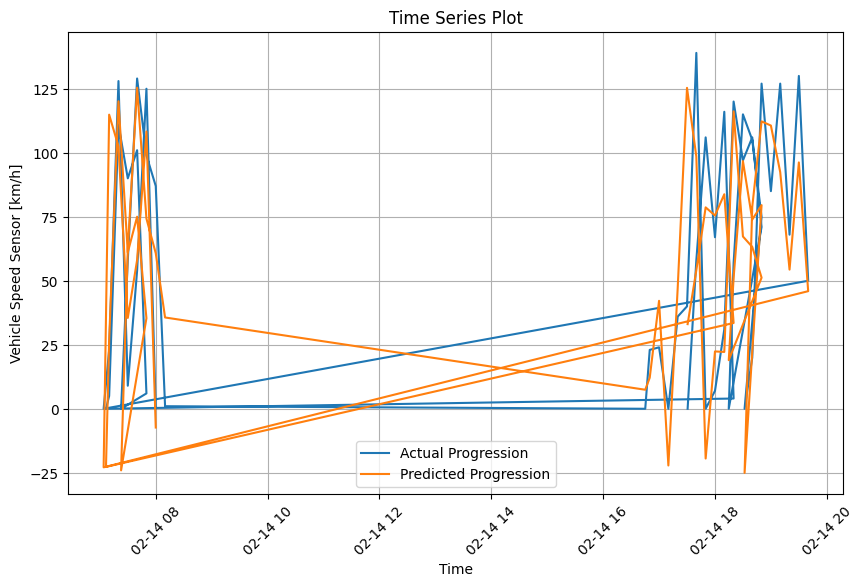

In [62]:
plt.figure(figsize=(10, 6))
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Vehicle Speed Sensor [km/h]')
plt.plot(test_data['Time'], test_data['Vehicle Speed Sensor [km/h]'], label=f"Actual Progression")
plt.plot(test_data['Time'], forecast, label=f"Predicted Progression")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add legend
plt.show()

### Predict Categorical Data
In this section we would be training a category prediction model to detect the condition of the vehicle given the hour, minute, source, destination and vehicle speed.

In [48]:
analytics_df['hour'] = analytics_df['Time'].dt.hour
analytics_df['minute'] = analytics_df['Time'].dt.minute

In [49]:
analytics_df.head()

Time  Engine Coolant Temperature [Â°C]  \
RoundedTime                                                                    
2024-02-14 06:50:00 2024-02-14 06:58:50.068                              8.0   
2024-02-14 07:00:00 2024-02-14 07:00:00.085                             11.0   
2024-02-14 07:10:00 2024-02-14 07:10:00.004                             66.0   
2024-02-14 07:20:00 2024-02-14 07:20:00.029                             89.0   
2024-02-14 07:30:00 2024-02-14 07:30:00.086                             90.0   

                     Intake Manifold Absolute Pressure [kPa]  \
RoundedTime                                                    
2024-02-14 06:50:00                                     95.0   
2024-02-14 07:00:00                                    101.0   
2024-02-14 07:10:00                                    130.0   
2024-02-14 07:20:00                                    104.0   
2024-02-14 07:30:00                                    108.0   

                     Engine RPM [RPM]  Vehicle Speed Sensor [km/h]  \
RoundedTime                                                          
2024-02-14 06:50:00               0.0                          0.0   
2024-02-14 07:00:00            1045.0                          3.0   
2024-02-14 07:10:00            1607.0                         79.0   
2024-02-14 07:20:00            1360.0                         53.0   
2024-02-14 07:30:00            1818.0                        108.0   

                     Intake Air Temperature [Â°C]  \
RoundedTime                                        
2024-02-14 06:50:00                          0.0   
2024-02-14 07:00:00                          5.0   
2024-02-14 07:10:00                         -4.0   
2024-02-14 07:20:00                         -5.0   
2024-02-14 07:30:00                         -3.0   

                     Air Flow Rate from Mass Flow Sensor [g/s]  \
RoundedTime                                                      
2024-02-14 06:50:00                                       0.86   
2024-02-14 07:00:00                                      18.72   
2024-02-14 07:10:00                                      22.11   
2024-02-14 07:20:00                                      11.61   
2024-02-14 07:30:00                                      16.38   

                     Absolute Throttle Position [%]  \
RoundedTime                                           
2024-02-14 06:50:00                            89.0   
2024-02-14 07:00:00                            83.5   
2024-02-14 07:10:00                            83.5   
2024-02-14 07:20:00                            83.5   
2024-02-14 07:30:00                            83.5   

                     Ambient Air Temperature [Â°C]  \
RoundedTime                                         
2024-02-14 06:50:00                           0.0   
2024-02-14 07:00:00                          -2.0   
2024-02-14 07:10:00                          -8.0   
2024-02-14 07:20:00                          -8.0   
2024-02-14 07:30:00                          -9.0   

                     Accelerator Pedal Position D [%]  \
RoundedTime                                             
2024-02-14 06:50:00                              14.1   
2024-02-14 07:00:00                              14.1   
2024-02-14 07:10:00                              38.8   
2024-02-14 07:20:00                              20.4   
2024-02-14 07:30:00                              14.1   

                     Accelerator Pedal Position E [%]       date  brand  \
RoundedTime                                                               
2024-02-14 06:50:00                              14.5 2018-03-01      0   
2024-02-14 07:00:00                              14.5 2018-03-01      0   
2024-02-14 07:10:00                              39.2 2018-03-01      0   
2024-02-14 07:20:00                              16.5 2018-03-01      0   
2024-02-14 07:30:00                              14.5 2018-03-01      0   

                     mo

In [50]:
analytics_df.columns

Index(['Time', 'Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]',
       'Air Flow Rate from Mass Flow Sensor [g/s]',
       'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]',
       'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]',
       'date', 'brand', 'model', 'source', 'destination', 'condition', 'hour',
       'minute'],
      dtype='object')

In [51]:
reserved_columns = ['Vehicle Speed Sensor [km/h]', 'source', 'destination', 'condition',
       'hour', 'minute']
columns_to_drop = set(analytics_df.columns) - set(reserved_columns)


In [52]:
columns_to_drop

{'Absolute Throttle Position [%]',
 'Accelerator Pedal Position D [%]',
 'Accelerator Pedal Position E [%]',
 'Air Flow Rate from Mass Flow Sensor [g/s]',
 'Ambient Air Temperature [Â°C]',
 'Engine Coolant Temperature [Â°C]',
 'Engine RPM [RPM]',
 'Intake Air Temperature [Â°C]',
 'Intake Manifold Absolute Pressure [kPa]',
 'Time',
 'brand',
 'date',
 'model'}

In [53]:
categoryical_analysis_df = analytics_df.drop(columns=list(columns_to_drop))

In [54]:
categoryical_analysis_df.head()

Vehicle Speed Sensor [km/h]  source  destination  \
RoundedTime                                                             
2024-02-14 06:50:00                          0.0       0            1   
2024-02-14 07:00:00                          3.0       0            1   
2024-02-14 07:10:00                         79.0       0            1   
2024-02-14 07:20:00                         53.0       0            1   
2024-02-14 07:30:00                        108.0       0            1   

                     condition  hour  minute  
RoundedTime                                   
2024-02-14 06:50:00          0     6      58  
2024-02-14 07:00:00          0     7       0  
2024-02-14 07:10:00          0     7      10  
2024-02-14 07:20:00          0     7      20  
2024-02-14 07:30:00          0     7      30

In [55]:
X = categoryical_analysis_df.drop(columns=['condition'])
y = categoryical_analysis_df['condition']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# train the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

In [95]:
with open('random_forest_model.pkl', 'rb') as f:
    rf_classifier  = pickle.load(f)

In [96]:
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.8076923076923077


In [116]:
y_pred[0]

0

We were able to acheive 82% accuracy on our condition prediction model ðŸŽ‰ðŸŽ‰ðŸŽ‰ðŸŽ‰

### Build the query engine 
Once the dataset has been loaded into a pandas dataframe, we can now use llama index to build a query engine on our dataframe

In [22]:
from llama_index.llms.openai import OpenAI
from llama_index.service_context import ServiceContext
from llama_index.query_engine.pandas import PandasQueryEngine

In [23]:
llm = OpenAI(model="mistralai/Mixtral-8x7B-Instruct-v0.1")

In [24]:
df.head()

Time  Engine Coolant Temperature [Â°C]  \
9  2024-02-20 06:58:50.068                              8.0   
10 2024-02-20 06:58:50.158                              8.0   
11 2024-02-20 06:58:50.248                              8.0   
12 2024-02-20 06:58:50.338                              8.0   
13 2024-02-20 06:58:50.429                              8.0   

    Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
9                                      95.0               0.0   
10                                     95.0               0.0   
11                                     95.0               0.0   
12                                     95.0               0.0   
13                                     95.0               0.0   

    Vehicle Speed Sensor [km/h]  Intake Air Temperature [Â°C]  \
9                           0.0                          0.0   
10                          0.0                          0.0   
11                          0.0                          0.0   
12                          0.0                          0.0   
13                          0.0                          0.0   

    Air Flow Rate from Mass Flow Sensor [g/s]  Absolute Throttle Position [%]  \
9                                        0.86                            89.0   
10                                       0.86                            89.0   
11                                       0.86                            89.0   
12                                       0.86                            89.0   
13                                       0.86                            89.0   

    Ambient Air Temperature [Â°C]  Accelerator Pedal Position D [%]  \
9                            0.0                              14.1   
10                           0.0                              14.1   
11                           0.0                              14.1   
12                           0.0                              14.1   
13                           0.0                              14.1   

    Accelerator Pedal Position E [%]        date brand model source  \
9                               14.5  2018-03-01  Seat  Leon     RT   
10                              14.5  2018-03-01  Seat  Leon     RT   
11                              14.5  2018-03-01  Seat  Leon     RT   
12                              14.5  2018-03-01  Seat  Leon     RT   
13                              14.5  2018-03-01  Seat  Leon     RT   

   destination condition  
9            S    Normal  
10           S    Normal  
11           S    Normal  
12           S    Normal  
13           S    Normal

In [25]:
service_context = ServiceContext.from_defaults(llm=llm)

In [26]:
query_engine_with_sythesis =  PandasQueryEngine(df=df, service_context=service_context, verbose=True, synthesize_response=True)
query_engine =  PandasQueryEngine(df=df, service_context=service_context, verbose=True, synthesize_response=False)

In [27]:
response = query_engine_with_sythesis.query("what was the maximum speed on the 26th of march 2018?")

> Pandas Instructions:
```
 df.loc[df['date'] == '2018-03-26', 'Vehicle Speed Sensor [km/h]'].max()
```
> Pandas Output: 128.0


In [28]:
from pprint import pprint
pprint(response.response)

' On the 26th of March, 2018, the maximum speed recorded was 128.0 km/h.'


In [29]:
response = query_engine.query("what was the maximum speed on the 26th of march 2018?")

> Pandas Instructions:
```
 df.loc[df['date'] == '2018-03-26', 'Vehicle Speed Sensor [km/h]'].max()
```
> Pandas Output: 128.0


In [30]:
pprint(response.response)

'128.0'


#### Build a Langchain Agent
The last part of the project involves building a ReAct based agent with langchain. ReAct is a prompting framework that allows us to build AI agents by adding reasoning, acting and observation to the agent exectution workflow

In [31]:
from langchain import hub
from langchain.agents import AgentExecutor
from langchain.agents.react.agent import create_react_agent
from langchain.agents.openai_functions_agent.base import create_openai_functions_agent
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_openai.chat_models import ChatOpenAI
from langchain_experimental.tools import PythonREPLTool
from langchain_core.prompts.chat import ChatPromptTemplate

In [32]:
llm = ChatOpenAI(model="mistralai/Mixtral-8x7B-Instruct-v0.1", temperature=0.1)

In [33]:
# pull the prompts for react agent and openai functions agent
# Get the prompt to use - you can modify this!
openai_fn_agent_prompt: ChatPromptTemplate = hub.pull("hwchase17/openai-functions-agent")
openai_fn_agent_prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant')),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [34]:
# Get the prompt to use - you can modify this!
react_agent_prompt: ChatPromptTemplate = hub.pull("hwchase17/react")
react_agent_prompt

PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'], template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}')

#### First we create a diagraming agent
The diagraming agent is responsible for drawing diagrams with matplotlib to answer questions about the dataset

In [35]:
diagraming_agent = create_pandas_dataframe_agent(llm=llm, df=df, verbose=False)

In [36]:
from textwrap import dedent

In [37]:
def query_diagraming_agent(query):
    prompt = dedent(
        """
            [INST]
            You are a python diagraming agent. You make use of use of matplotlib and a dataframe named
            df to plot diagrams based on user queries.
            
            For the following query, you will output a python code snippet that makes use of a dataframe named df
            and matplotlib to plot either a bar chart or a line chart. 
            
            Your output should be python code wrapped in quote strings.

            Lets think step by step.

            Below is the query.
            Query: 
            
            [/INST]
            """
        + query
    )

    # Run the prompt through the agent.
    response = diagraming_agent.run(prompt)
    return response.__str__()

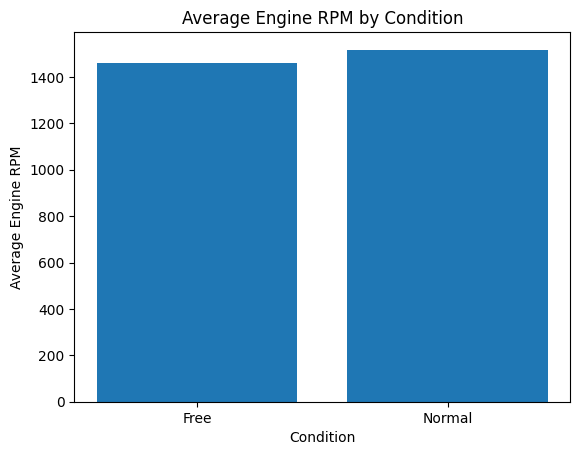

In [45]:
response = query_diagraming_agent("create a bar chart for the free and normal conditions, with the condition being the columns and average engine rpm being the value")

In [42]:
response

"```python\nimport matplotlib.pyplot as plt\n\n# Filter dataframe for Normal and Free conditions\ndf_filtered = df[(df['condition'] == 'Normal') | (df['condition'] == 'Free')]\n\n# Calculate average vehicle speed for each condition\navg_speed_by_condition = df_filtered.groupby('condition')['Vehicle Speed Sensor [km/h]'].mean().reset_index()\n\n# Create a bar chart\nplt.bar(avg_speed_by_condition['condition'], avg_speed_by_condition['Vehicle Speed Sensor [km/h]'])\nplt.xlabel('Condition')\nplt.ylabel('Average Vehicle Speed [km/h]')\nplt.title('Average Vehicle Speed by Condition')\nplt.show()\n```\nExplanation:\n\nTo create a bar chart for the normal and free conditions, with the condition being the columns and average vehicle velocity being the value, we first filter the dataframe for the 'Normal' and 'Free' conditions. Then, we calculate the average vehicle speed for each condition using the `groupby` and `mean` functions. Finally, we create a bar chart using the `plt.bar` function, wi

Given that the diagraming agent is unpredictable, we would be using the python REPL for diagraming

#### Create test agents with dummy tools to test capabilities
In this section, we will create two dummy tools to create both openai function agents, and react agents

In [107]:
from pydantic.v1 import BaseModel, Field

In [108]:
from langchain.tools import tool

The tools we want to use are: 
- dataset question answering
- dataset diagramming
- series prediction
- condition prediction
- afj limited question
- python repl

In [109]:
class DataSetQuestionAnswerSchema(BaseModel):
    """ 
    Schema to be used when asking questions about the dataset
    """
    query:str = Field(description="query question to be asked about the dataset")

In [110]:
@tool("dataset-question-answer", args_schema=DataSetQuestionAnswerSchema, return_direct=True)
def dataset_question_answer(query:str):
    """
    Provides answer to any question asked about the dataset. 
    It takes a natural language question about the dataset and provides a natural language response.
    """
    print("data set question asked")
    # response = query_engine_with_sythesis.query(query)
    # return str(response.response)
    return "data set response"

In [111]:
class DataSetDiagramRequestSchema(BaseModel):
    """
    Schema to used when requesting to draw a diagram from the dataset
    """
    query:str = Field(description="query describing type and nature of diagram to be drawn")
    

In [112]:
@tool("dataset-diagram-request", args_schema=DataSetDiagramRequestSchema, return_direct=False)
def dataset_diagram_request(query: str):
    """ 
    Draws diagram for information about the dataset
    It takes a natural language diagram request and draws the diagram
    """
    # response = query_diagraming_agent(query)
    # return response
    print("calling diagram agent")
    return "diagram info"

    

In [113]:
class VehicleVelocityPredictionSchema(BaseModel):
    engine_coolant_temp: float = Field(description="The engine coolant temperature of the vehicle")
    intake_manifold_pressure: float = Field(description="The Intake manifold absolute pressure of the vehicle")
    engine_rpm: float = Field(description="The engine rpm of the vehicle")
    source: str = Field(description="The source location of the vehicle")
    destination: str = Field(description="The destination location of the vehicle")
    condition: str = Field(description="The condition of the vehicle, must be one of the following: 'Normal','Free', 'Traffic', 'Emergency Braking','Normal Icy Road','Free Accelaration','Traffic Jam Measurement error'")


In [114]:
@tool("predict-vehicle-velocity", args_schema=VehicleVelocityPredictionSchema, return_direct=False)
def predict_vehicle_velocity(engine_coolant_temp, intake_manifold_pressure, engine_rpm, source, destination, condition):
    """ 
    The function allows for predicting the vehicle velocity given the following fields:
    engine coolant temperature, intake manifold pressure, engine rpm, source, destination and condition
    """
    print("velocity prediction function called")
    return "predicted velocity is 23 km/h"

In [118]:
class VehicleConditionPredictionSchema(BaseModel):
    vechicle_speed:float = Field(description="Vehicle speed defines the speed the vehicle is moving at")
    source:str = Field(description="This is the source location of the vehicle")
    destination:str	= Field(description="This is the destination location of the vehicle")
    hour:int = Field(description="This is the hour the measurement was taken")
    minute:int = Field(description="This is the minute the measurement was taken")

In [119]:
@tool("predict-vehicle-condition", args_schema=VehicleConditionPredictionSchema, return_direct=False)
def predict_vehicle_condition(vehicle_speed, source, destination, hour, minute):
    """ 
    This tool is used to predict the condition of a vehicle given the vehicle speed, source location, destination location
    hour and minute of the measurement. It will uses this information to infer the current condition of the vehicle which could
    be one of the following:
    Normal,Free,Traffic,Emergency Braking,Normal Icy Road,Free Accelaration,Traffic Jam Measurement error
    """
    print("vehicle condition prediction function called")
    return "The condition of the vehicle is : Normal"

In [120]:
class AFJLimitedQASchema(BaseModel):
    query: str = Field(description="This contains a question the user would like to ask about AFJ Limited")

In [121]:
@tool("afj-limited-qa", args_schema=AFJLimitedQASchema, return_direct=False)
def afj_limited_qa(query):
    """ 
    This tool receives a query string about any questions relating to AFJ Limited.
    It processes the query and produces a natural language response to the query
    """
    print("afj limited query function called")
    return "AFJlimited Info"

In [122]:
# create python repl tool
python_repl = PythonREPLTool()


In [123]:
tools = [python_repl,
         dataset_question_answer, 
         dataset_diagram_request, 
         predict_vehicle_velocity,
         predict_vehicle_condition, 
         afj_limited_qa]

In [124]:
from langchain.agents.openai_tools.base import create_openai_tools_agent

In [125]:
test_openai_agent = create_openai_functions_agent(llm, tools, openai_fn_agent_prompt)

OpenAI termed the capability to invoke a single function as functions, and the capability to invoke one or more functions as tools.

In [126]:
agent_executor = AgentExecutor(agent=test_openai_agent, tools=tools, verbose=True)

In [141]:
response = agent_executor.invoke({"input": "hi!"})



> Entering new AgentExecutor chain...
 Hello! How can I assist you today?

> Finished chain.


In [142]:
response

{'input': 'hi!', 'output': ' Hello! How can I assist you today?'}

In [143]:
import json
output = json.loads(response['output'])

JSONDecodeError: Expecting value: line 1 column 2 (char 1)

In [134]:
type(response['output'])

str

In [135]:
response = agent_executor.invoke({"input": "Where is AFJ limited located?"})



> Entering new AgentExecutor chain...
 [
  {
    "name": "afj-limited-qa",
    "arguments": {
      "query": "Where is AFJ limited located?"
    }
  }
]

> Finished chain.


In [138]:
import json

In [139]:
output = json.loads(response['output'])

In [140]:
output

[{'name': 'afj-limited-qa',
  'arguments': {'query': 'Where is AFJ limited located?'}}]

In [125]:
agent_executor.invoke({"input": "from the dataset what is the average velocity from all the datapoints"})



> Entering new AgentExecutor chain...
 [
  {
    "name": "dataset-question-answer",
    "arguments": {
      "query": "What is the average velocity from all the datapoints in the dataset?"
    }
  }
]

> Finished chain.


{'input': 'from the dataset what is the average velocity from all the datapoints',
 'output': ' [\n  {\n    "name": "dataset-question-answer",\n    "arguments": {\n      "query": "What is the average velocity from all the datapoints in the dataset?"\n    }\n  }\n]'}

In [126]:
agent_executor.invoke({"input": "find the 10th fibonacci number using python"})



> Entering new AgentExecutor chain...
 [
  {
    "name": "Python_REPL",
    "arguments": {
      "__arg1": "def fibonacci(n):\n    if n <= 0:\n        return 0\n    elif n == 1:\n        return 1\n    else:\n        return fibonacci(n-1) + fibonacci(n-2)\n\nprint(fibonacci(10))"
    }
  }
]

> Finished chain.


{'input': 'find the 10th fibonacci number using python',
 'output': ' [\n  {\n    "name": "Python_REPL",\n    "arguments": {\n      "__arg1": "def fibonacci(n):\\n    if n <= 0:\\n        return 0\\n    elif n == 1:\\n        return 1\\n    else:\\n        return fibonacci(n-1) + fibonacci(n-2)\\n\\nprint(fibonacci(10))"\n    }\n  }\n]'}

In [127]:
agent_executor.invoke({"input": "using the dataset draw a bar chart with the various vehicle conditions as the columns and the vehichle velocity as the values"})



> Entering new AgentExecutor chain...
 [
  {
    "name": "dataset-diagram-request",
    "arguments": {
      "query": "using the dataset draw a bar chart with the various vehicle conditions as the columns and the vehichle velocity as the values"
    }
  }
]

> Finished chain.


{'input': 'using the dataset draw a bar chart with the various vehicle conditions as the columns and the vehichle velocity as the values',
 'output': ' [\n  {\n    "name": "dataset-diagram-request",\n    "arguments": {\n      "query": "using the dataset draw a bar chart with the various vehicle conditions as the columns and the vehichle velocity as the values"\n    }\n  }\n]'}

In [129]:
agent_executor.invoke({"input": "given the vehicle speed of 30km/h, going from KA to S at 6:30 what is the predicted vehicle condition?"})



> Entering new AgentExecutor chain...
 [
  {
    "name": "predict-vehicle-condition",
    "arguments": {
      "vechicle_speed": 30,
      "source": "KA",
      "destination": "S",
      "hour": 6,
      "minute": 30
    }
  }
]

> Finished chain.


{'input': 'given the vehicle speed of 30km/h, going from KA to S at 6:30 what is the predicted vehicle condition?',
 'output': ' [\n  {\n    "name": "predict-vehicle-condition",\n    "arguments": {\n      "vechicle_speed": 30,\n      "source": "KA",\n      "destination": "S",\n      "hour": 6,\n      "minute": 30\n    }\n  }\n]'}

In [130]:
agent_executor.invoke({"input": "given the engine coolant temperature of 10, engine rpm of 20, going from KA to S at normal condition, what is the predicted velocity?"})



> Entering new AgentExecutor chain...
 [
  {
    "name": "predict-vehicle-velocity",
    "arguments": {
      "engine_coolant_temp": 10,
      "intake_manifold_pressure": 0,
      "engine_rpm": 20,
      "source": "KA",
      "destination": "S",
      "condition": "Normal"
    }
  }
]

> Finished chain.


{'input': 'given the engine coolant temperature of 10, engine rpm of 20, going from KA to S at normal condition, what is the predicted velocity?',
 'output': ' [\n  {\n    "name": "predict-vehicle-velocity",\n    "arguments": {\n      "engine_coolant_temp": 10,\n      "intake_manifold_pressure": 0,\n      "engine_rpm": 20,\n      "source": "KA",\n      "destination": "S",\n      "condition": "Normal"\n    }\n  }\n]'}

The openai function agent is not calling the functions, lets use the react agent instead to see if we can get a more preferred performance

In [169]:
test_react_agent = create_react_agent(llm, tools, react_agent_prompt)

In [170]:
react_agent_executor = AgentExecutor(agent=test_react_agent, tools=tools, verbose=True)

In [172]:
react_agent_executor.invoke({"input": "find the fibonacci of 10 using python"})



> Entering new AgentExecutor chain...
 To find the Fibonacci of a number in Python, I can use a loop to calculate the sequence up to the desired index. However, for larger numbers like 10, it would be more efficient to use a recursive function that utilizes memoization to reduce redundant calculations.

Action: Python_REPL
Action Input:
```python
def fibonacci(n, memo = {}):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    elif n not in memo:
        memo[n] = fibonacci(n - 1) + fibonacci(n - 2)
    return memo[n]

fibonacci(10)
``` Now that I have implemented the Fibonacci function in Python_REPL, I can use it to find the Fibonacci of 10.

Final Answer: 55

> Finished chain.


{'input': 'find the fibonacci of 10 using python', 'output': '55'}

In [174]:
react_agent_executor.invoke({"input": "say hello to John Stewart"})



> Entering new AgentExecutor chain...
 I need to use the "say-hello" tool with the name "John Stewart" as its input.
Action: say-hello
Action Input: John Stewart

ValueError: not enough values to unpack (expected 2, got 1)